## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [101]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

## Loading Data from Drive

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory data analysis

In [103]:

df = pd.read_csv('/content/drive/MyDrive/AI Projects/CreditCardFraud_detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [104]:
#observe the different feature type present in the data

# Display data types of each column

#print(df.dtypes)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [105]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

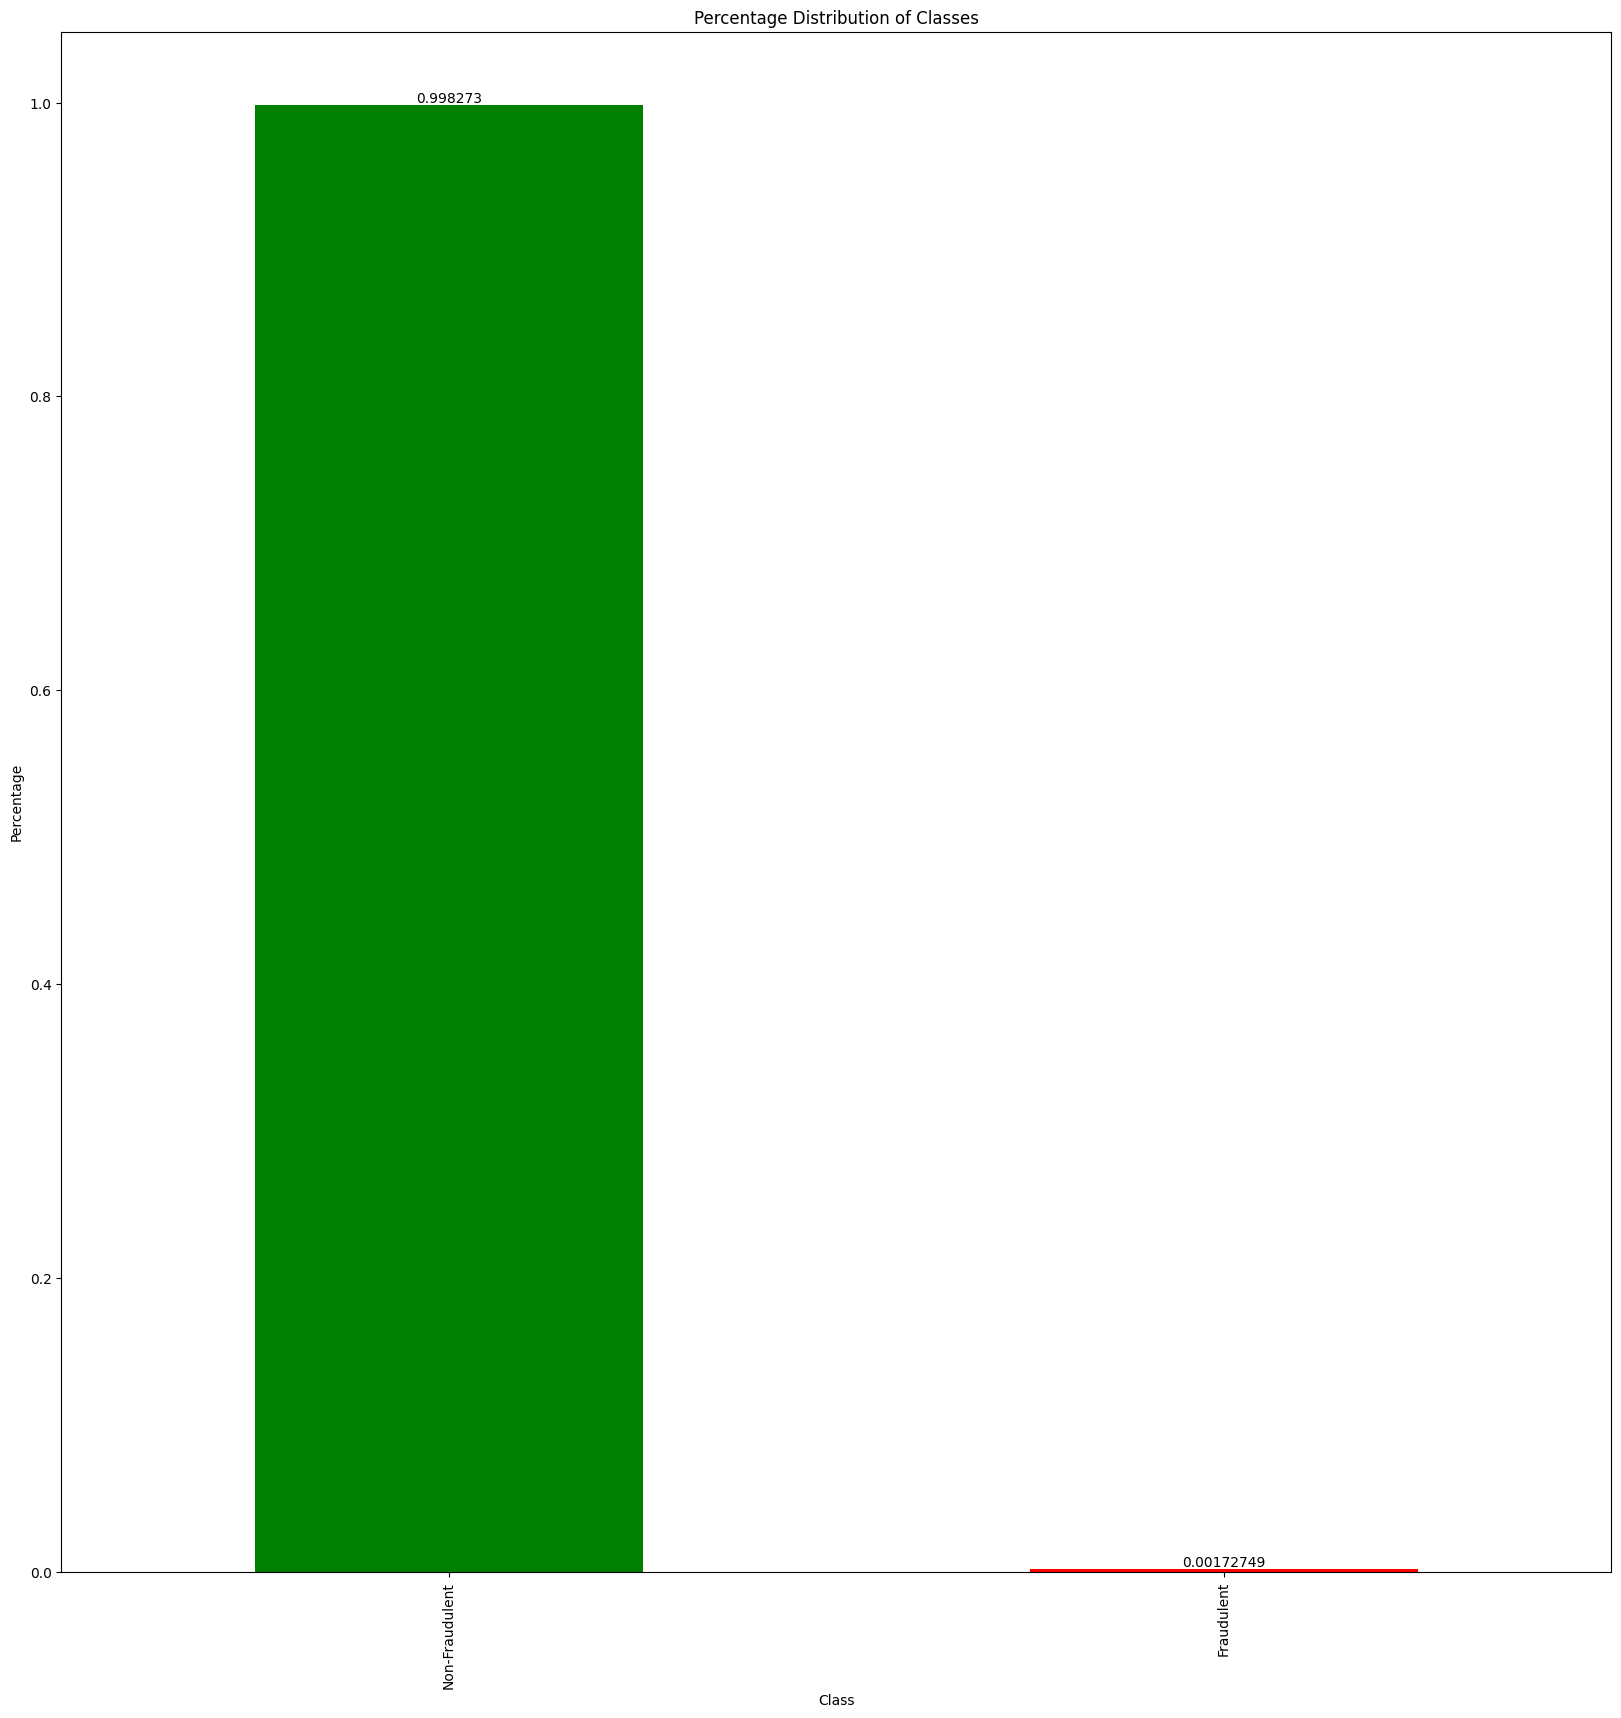

In [106]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# ax = df['Class'].value_counts(normalize = True).plot.bar(color = ['g', 'r'])
# ax.bar_label(ax.containers[0], label_type='edge')
# plt.title('Percentage Distribution of Classes')
# plt.xlabel('Class')
# plt.ylabel('Percentage')
# plt.show()

df_temp = df.copy()


class_labels = {0: 'Non-Fraudulent', 1: 'Fraudulent'}
df_temp['Class'] = df_temp['Class'].map(class_labels)

# Plotting
ax = df_temp['Class'].value_counts(normalize=True).plot.bar(color=['g', 'r'])
ax.bar_label(ax.containers[0], label_type='edge')

plt.title('Percentage Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()


In [107]:
# Create a scatter plot to observe the distribution of classes with time
# Distribution of classes with time

# creating fradulant dataframes
data_fraud = df[df['Class'] == 1]

# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]


In [108]:
# validation 2 dataframes

print(data_fraud.shape)
print(data_non_fraud.shape)

(492, 31)
(284315, 31)


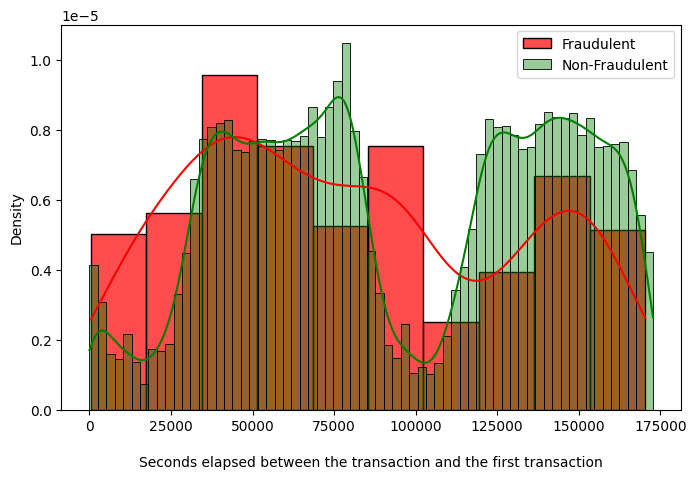

In [109]:
# Scatter plot to observe the distribution of classes with time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.histplot(data=data_fraud, x='Time', label='Fraudulent', kde=True, stat='density', color='red', alpha=0.7)
sns.histplot(data=data_non_fraud, x='Time', label='Non-Fraudulent', kde=True, stat='density', color='green', alpha=0.4)

plt.xlabel('\nSeconds elapsed between the transaction and the first transaction')
plt.legend(loc='best')
plt.show()

## Create a scatter plot to observe the distribution of classes with Amount


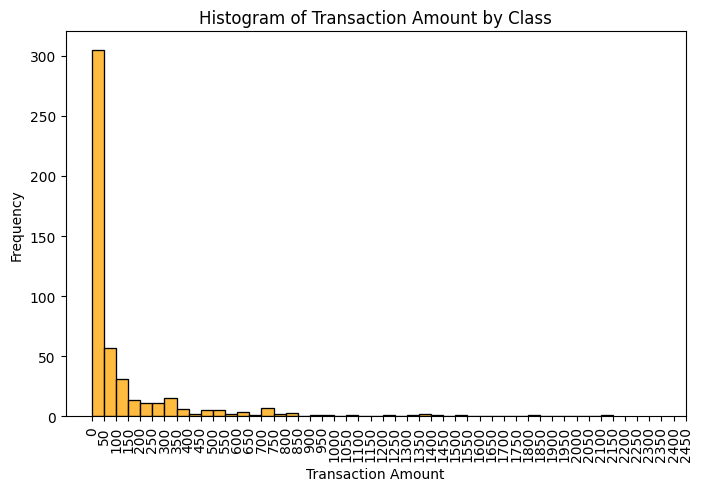

In [110]:
plt.figure(figsize=(8, 5))
plt.title('Histogram of Transaction Amount by Class')
sns.histplot(data_fraud['Amount'], binwidth=50, color='orange')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(range(0, 2500, 50), rotation=90)
plt.show()

**Analysis:**

*   The majority of fraudulent transactions occur with in the range of 0 to 50 dollars.
*   The highest recorded fraudulent transaction falls within the bracket of 2100 to 2150 dollars.


and


There is no discernible pattern in the relationship between time and the occurrence of fraudulent or non-fraudulent transactions. Therefore, it is reasonable to exclude the 'Time' column from further analysis.

In [111]:
# Drop unnecessary columns

# from above analysis can remove Time
df.drop('Time', axis=1, inplace=True)




In [112]:
# prompt: describe Amount column from df

df.Amount.describe()


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### Splitting the data into train & test data

In [113]:
y= df['Class']

In [114]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.70, stratify=y, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [115]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


All other columns other than **Amount** are already scaled by the PCA transformation. lets scale **Amount**


In [116]:
df[df.Class==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [118]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,-0.222719,...,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,-0.321082
214082,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,0.517022,...,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,0.243475
106005,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,0.086419,...,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,4.797594
58619,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,0.128383,...,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,-0.331514
191638,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,-0.283699,...,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,-0.331514


In [119]:
X_train['Amount'].describe()

count    1.993640e+05
mean     1.094163e-17
std      1.000003e+00
min     -3.492566e-01
25%     -3.268514e-01
50%     -2.623226e-01
75%     -4.301173e-02
max      1.011706e+02
Name: Amount, dtype: float64

### Plotting the distribution of a variable

In [120]:

cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [121]:
# plot the histogram of a variable from the dataset to see the skewness

import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde_for_variables(X_train, y_train, cols, figsize=(12, 20)):
    """
    Plot Kernel Density Estimation for each variable in the dataset based on class labels.

    Parameters:
    - X_train: DataFrame, the feature matrix.
    - y_train: Series, the target variable (class labels).
    - cols: list, the list of variables to plot.
    - figsize: tuple, the size of the entire figure.

    Returns:
    - None (plots the KDE for each variable).
    """
    k = 0
    plt.figure(figsize=figsize)

    for col in cols:
        k += 1
        plt.subplot(6, 5, k)

        # Using sns.kdeplot for Kernel Density Estimation
        g = sns.kdeplot(X_train.loc[(y_train == 0), col], color='blue', shade=True, label='Non-Fraudulent')
        g = sns.kdeplot(X_train.loc[(y_train == 1), col], color='orange', shade=True, label='Fraudulent')
        g.grid(False)

        plt.tight_layout()
        plt.title(col + ' --> ' + str(round(X_train[col].skew(), 3)))
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency Density", fontsize=12)
        plt.tick_params(labelsize=12)

    plt.show()

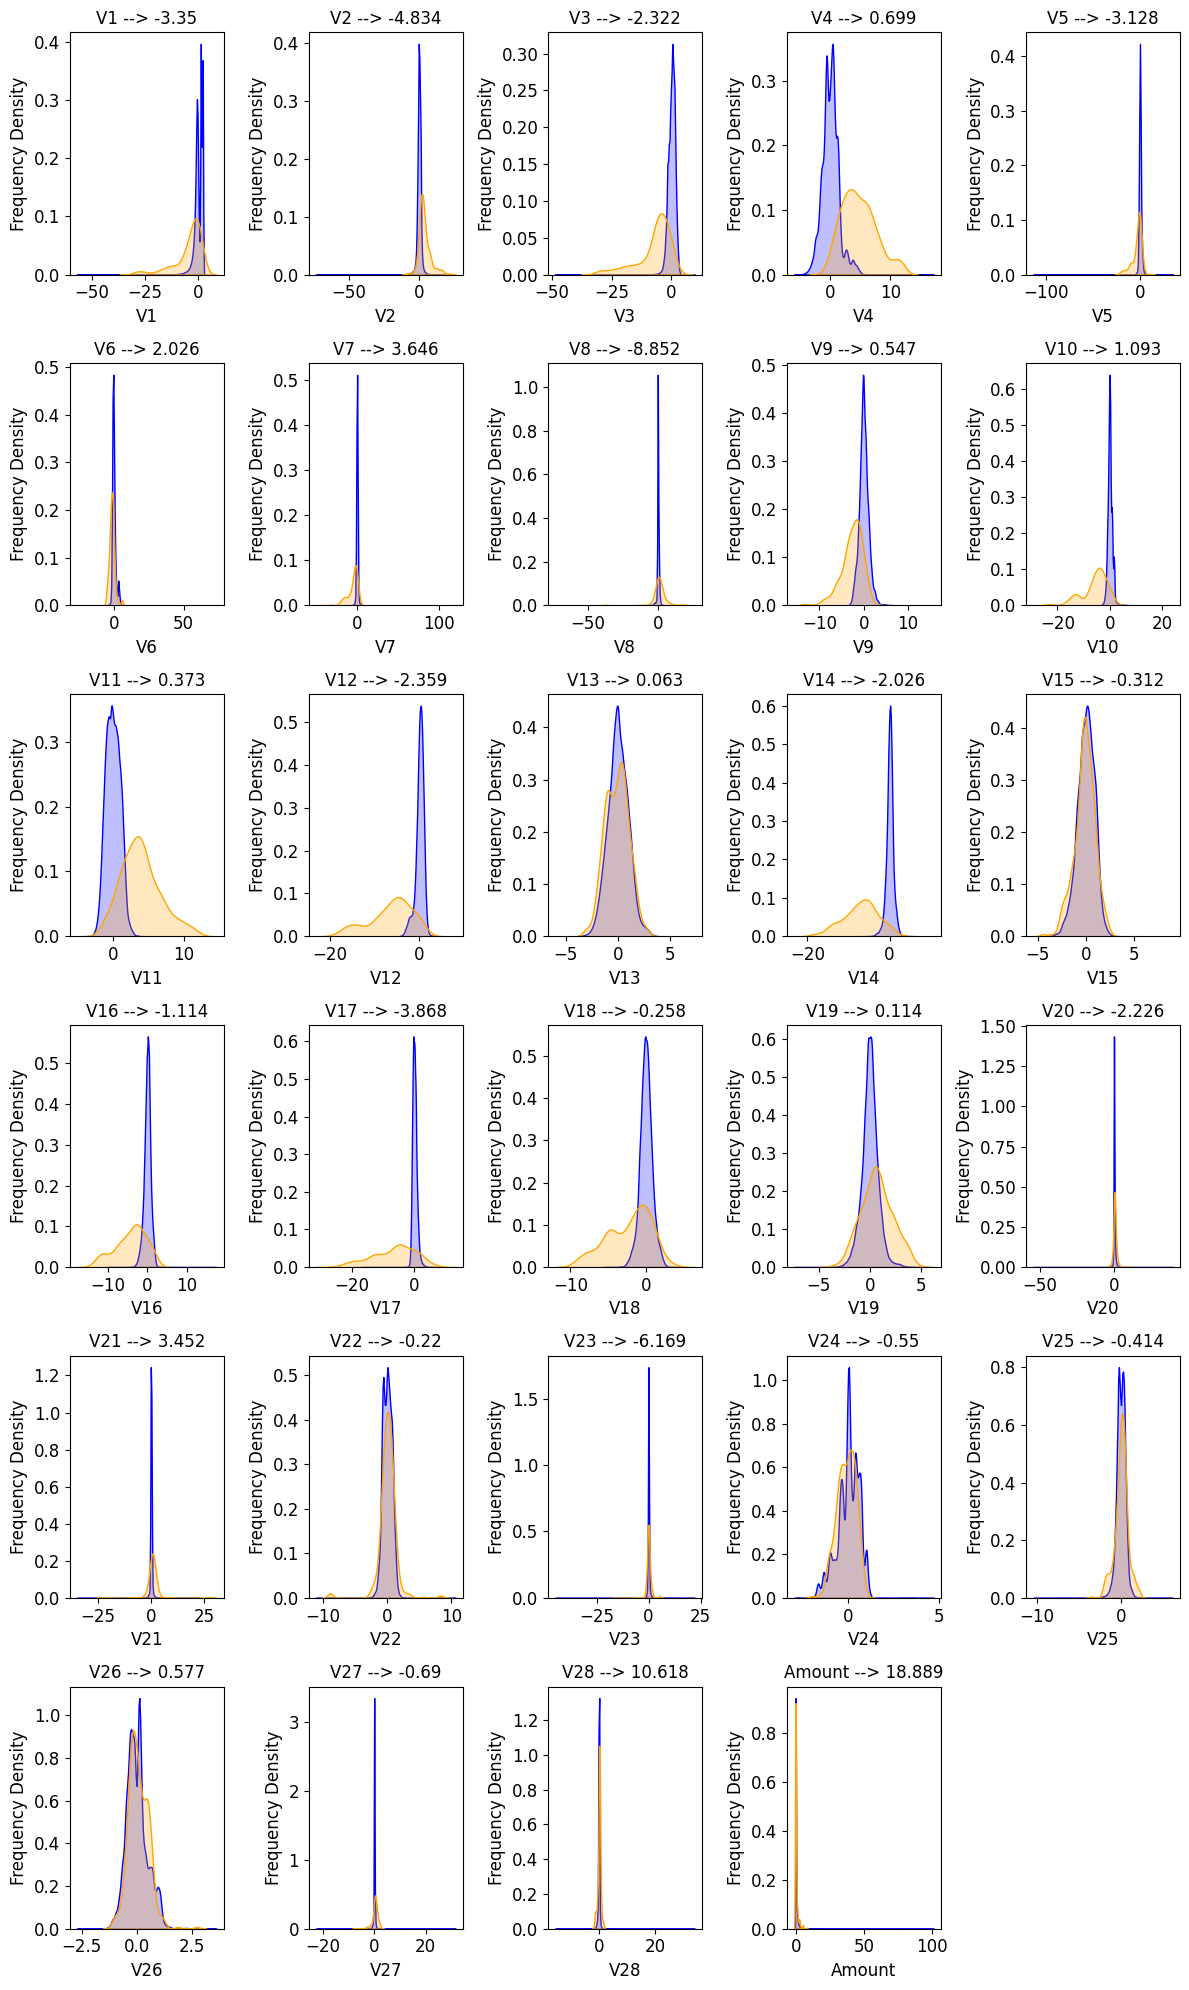

In [122]:
plot_kde_for_variables(X_train, y_train, cols)






*   **We can see  there are many variables, which are heavily skewed.**

*    **Consequently, our focus will be on addressing this skewness and transforming them into a more normal distribution.**




### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [123]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [124]:
# Transform the test set
X_test = pt.transform(X_test)

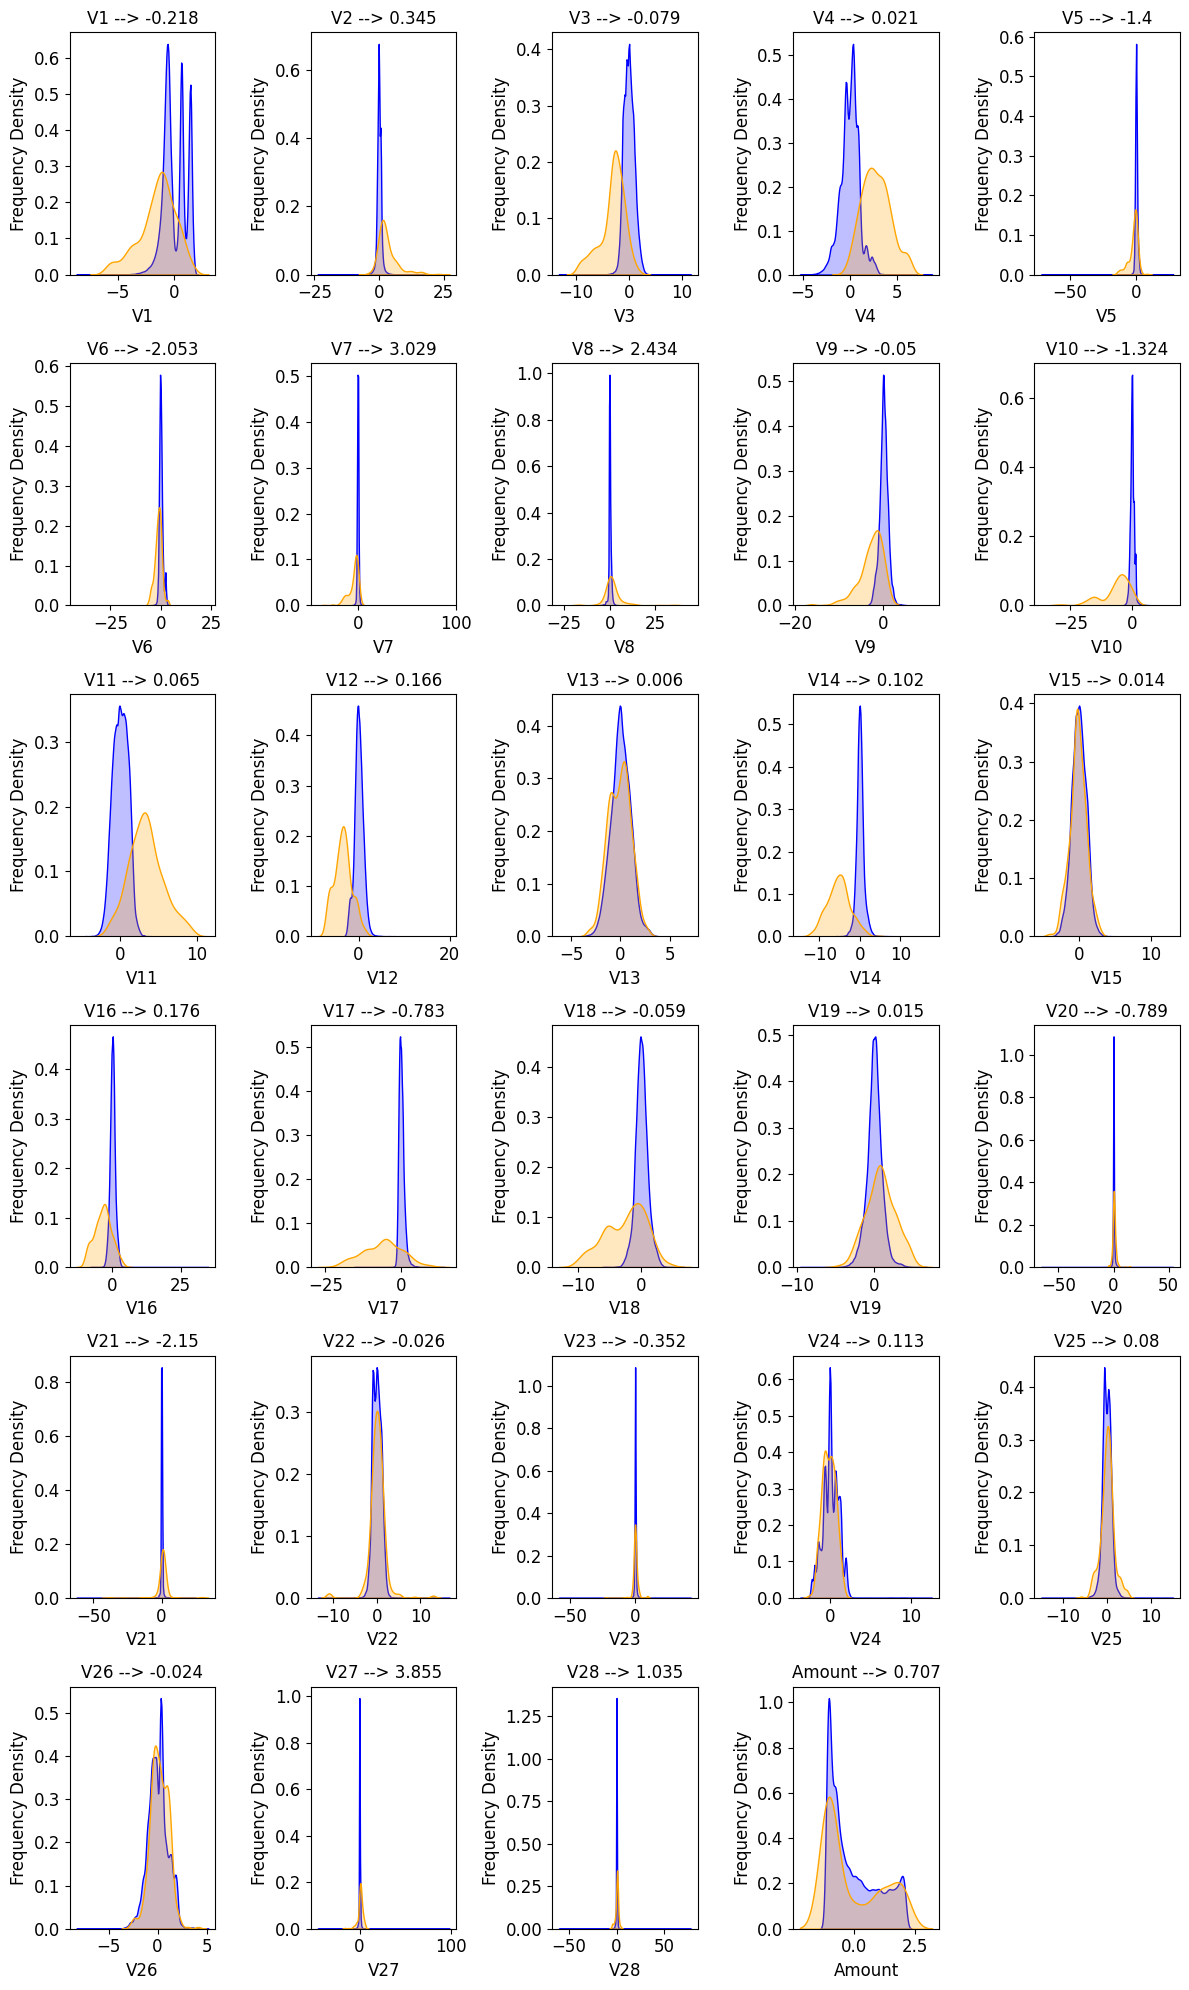

In [125]:
# plot the histogram of a variable from the dataset again to see the result
plot_kde_for_variables(X_train, y_train, cols)


**Now we can Observe that after transformation all the variables seems to be normallly distributed**






## Model Building
- Build different models on the imbalanced dataset and see the result


*   Logistic Regression
*   Decision Tree
*   XGBoost
*   Random Forest




#Logistic Regression

In [126]:
# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


#import the package
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [127]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, random_state=4, shuffle=True)

# specify params
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring ='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

In [128]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [129]:
# results of GridSearchCV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.523485,0.028397,0.021869,0.002533,0.01,{'C': 0.01},0.994970,0.982690,0.970501,0.993970,...,0.983722,0.009590,1,0.984436,0.988452,0.990826,0.985024,0.986544,0.987057,0.002342
1,1.181428,0.243004,0.039446,0.011478,0.1,{'C': 0.1},0.992936,0.979420,0.970119,0.995823,...,0.983642,0.009480,2,0.985116,0.988245,0.990107,0.984366,0.985881,0.986743,0.002127
2,0.839505,0.080322,0.025804,0.007655,1,{'C': 1},0.992249,0.978358,0.968759,0.996223,...,0.983091,0.009945,3,0.984815,0.987668,0.989583,0.983875,0.985321,0.986252,0.002082
3,0.852756,0.049379,0.024019,0.006421,10,{'C': 10},0.992175,0.978227,0.968587,0.996268,...,0.983016,0.010008,4,0.984769,0.987581,0.989507,0.983813,0.985249,0.986184,0.002073
4,1.255617,0.274503,0.030038,0.009799,100,{'C': 100},0.992166,0.978215,0.968565,0.996272,...,0.983009,0.010015,5,0.984765,0.987572,0.989498,0.983806,0.985241,0.986176,0.002072
5,0.815235,0.059179,0.021369,0.001339,1000,{'C': 1000},0.992165,0.978214,0.968562,0.996272,...,0.983007,0.010016,6,0.984765,0.987571,0.989497,0.983804,0.985240,0.986176,0.002072


In [32]:
cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_fit_time', 'mean_score_time', 'mean_train_score']]


,params,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,mean_train_score
0,{'C': 0.01},0.983722,0.009590,1,0.497662,0.022330,0.987057
1,{'C': 0.1},0.983642,0.009480,2,1.031312,0.032722,0.986743
2,{'C': 1},0.983091,0.009945,3,0.930799,0.022886,0.986252
3,{'C': 10},0.983016,0.010008,4,0.783623,0.021359,0.986184
4,{'C': 100},0.983009,0.010015,5,1.083062,0.029727,0.986176
5,{'C': 1000},0.983007,0.010016,6,0.983640,0.021910,0.986176


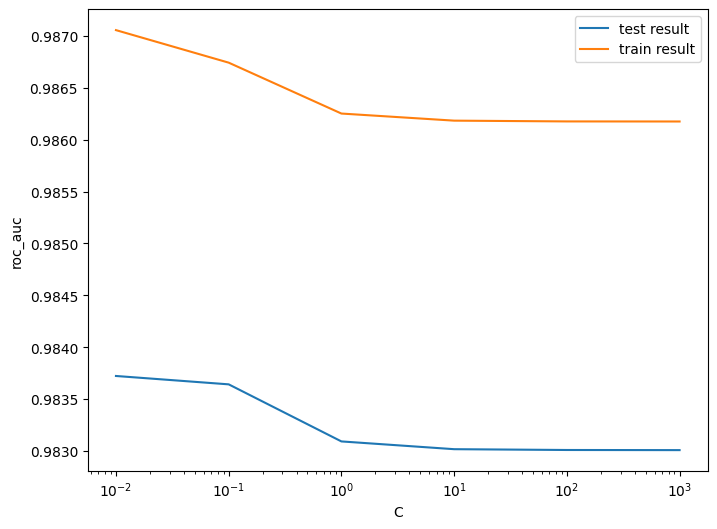

In [130]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper right')
plt.xscale('log')

**Now find Best Score and Parameters**

In [34]:
# best score and params

best_score = model_cv.best_score_
best_params = model_cv.best_params_['C']

print(f"Best Score: {best_score}")
print(f"Best Params: {best_params}")

Best Score: 0.9837222270065269
Best Params: 0.01


In [35]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [36]:
logistic_imb_model = logistic_imb.fit(X_train, y_train)


In [37]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate and print various classification metrics based on the confusion matrix.

    Parameters:
    - y_true: array-like, true class labels.
    - y_pred: array-like, predicted class labels.

    Returns:
    - None (prints metrics).
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    TN, FP, FN, TP = cm.ravel()  # Unpack confusion matrix

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    specificity = TN / (TN + FP)
    f1 = f1_score(y_true, y_pred)

    # Print metrics
    print(f"Confusion Matrix:\n{cm}\n")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
    print(f"Specificity (True Negative Rate): {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")


In [39]:
calculate_classification_metrics(y_train, y_train_pred)


Confusion Matrix:
[[198998     22]
 [   131    213]]

Accuracy: 0.9992
Sensitivity (True Positive Rate): 0.6192
Specificity (True Negative Rate): 0.9999
F1 Score: 0.7358


In [40]:
print(classification_report(y_train, y_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



**ROC Curve**

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_probs, figsize=(5, 5), title='Receiver Operating Characteristic'):
    """
    Plot the Receiver Operating Characteristic (ROC) curve.

    Parameters:
    - y_true: array-like, true class labels.
    - y_probs: array-like, predicted probabilities for the positive class.
    - figsize: tuple, the size of the figure.
    - title: str, the title of the plot.

    Returns:
    - None (displays the ROC curve).
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc_score = roc_auc_score(y_true, y_probs)

    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

In [42]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]
y_train_pred_proba

array([0.00014499, 0.00038312, 0.00057989, ..., 0.00048833, 0.00045125,
       0.00026289])

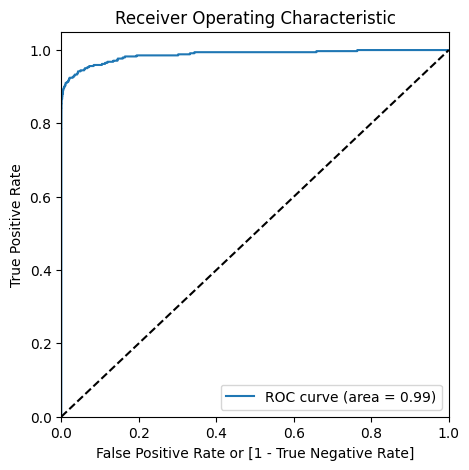

In [43]:
plot_roc_curve(y_train, y_train_pred_proba)


**We are able to achive very good ROC 0.99 on the train set.**


In [44]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [45]:
calculate_classification_metrics(y_test, y_test_pred)


Confusion Matrix:
[[85281    14]
 [   59    89]]

Accuracy: 0.9991
Sensitivity (True Positive Rate): 0.6014
Specificity (True Negative Rate): 0.9998
F1 Score: 0.7092


In [46]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.60      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



**ROC on the test set**


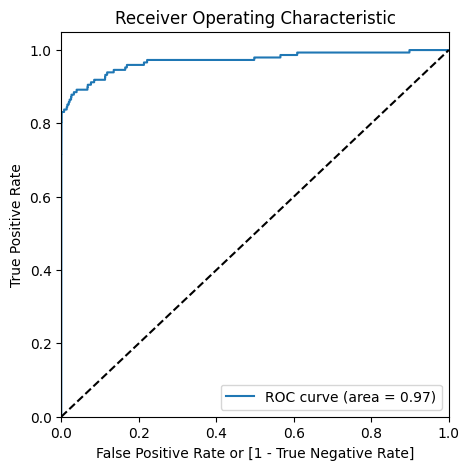

In [47]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc_curve(y_test, y_test_pred_proba)

**We are able to achive very good ROC 0.97 on the Test set.**


**Logistic Regression  Model summary**

Train set

*   Accuracy = 0.99
*   Sensitivity = 0.62
*   Specificity = 0.99
*   F1-Score = 0.73
*   ROC = 0.99

Test set

*   Accuracy = 0.99
*   Sensitivity = 0.60
*   Specificity = 0.99
*   F1-Score = 0.70
*   ROC = 0.97

Overall, the model is performing well in both and Train and Test set

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Decision Tree

In [48]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [49]:
# Define the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the Decision Tree classifier
dtree = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [50]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.347859,0.407121,0.022528,0.004760,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.930088,0.945270,0.936129,0.937162,0.006241,6
1,3.073160,0.173983,0.021471,0.004844,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.930095,0.945270,0.936129,0.937164,0.006238,5
2,3.230005,0.385894,0.018833,0.000338,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.938053,0.941089,0.935985,0.938376,0.002096,3
3,3.394844,0.413040,0.025857,0.002819,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.938053,0.941089,0.935985,0.938376,0.002096,3
4,6.004805,0.206330,0.023769,0.006284,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.961032,0.968050,0.906220,0.945101,0.027642,1
5,5.987166,0.172811,0.024423,0.005940,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.961047,0.968056,0.897682,0.942262,0.031652,2
6,6.191318,0.702814,0.024666,0.006079,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.926032,0.962107,0.906110,0.931416,0.023176,8
7,6.219926,0.708143,0.020012,0.000615,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.926030,0.963205,0.906051,0.931762,0.023682,7


In [51]:
grid_search.best_score_

0.9451005849716241

In [52]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [53]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion="gini",
                                       random_state=100,
                                       max_depth=10,
                                       min_samples_leaf=50,
                                       min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [54]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [55]:
calculate_classification_metrics(y_train, y_train_pred)


Confusion Matrix:
[[198982     38]
 [   118    226]]

Accuracy: 0.9992
Sensitivity (True Positive Rate): 0.6570
Specificity (True Negative Rate): 0.9998
F1 Score: 0.7434


In [56]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [57]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9642430686526772

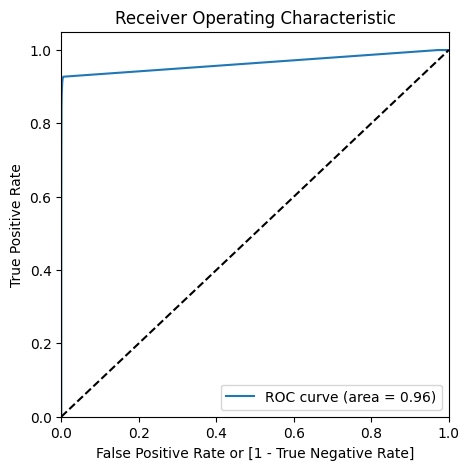

In [58]:
plot_roc_curve(y_train, y_train_pred_proba)


In [59]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)


In [60]:
calculate_classification_metrics(y_test, y_test_pred)


Confusion Matrix:
[[85272    23]
 [   58    90]]

Accuracy: 0.9991
Sensitivity (True Positive Rate): 0.6081
Specificity (True Negative Rate): 0.9997
F1 Score: 0.6897


In [61]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]


In [62]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9205109690850355

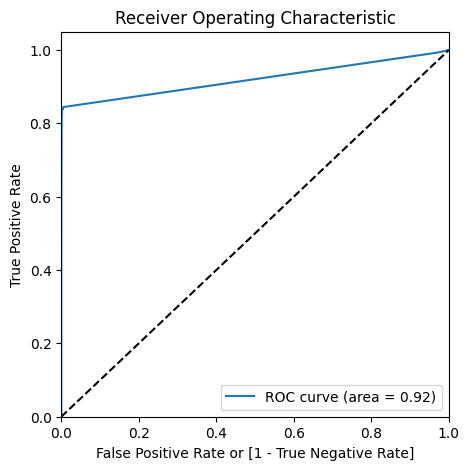

In [63]:
plot_roc_curve(y_test, y_test_pred_proba)


**Decision Tree  Model summary**

Train set

*   Accuracy = 0.99
*   Sensitivity = 0.65
*   Specificity = 0.99
*   F1-Score = 0.74
*   ROC = 0.96


Test set

*   Accuracy = 0.99
*   Sensitivity = 0.60
*   Specificity = 0.99
*   F1-Score = 0.68
*   ROC = 0.92

Overall, the model is performing well but still logistic regression is doing better with Train and Test Data Set


#XGBoost

In [64]:
from xgboost import XGBClassifier


In [65]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
               'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.463365,1.300813,0.104250,0.000840,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968849,0.980627,0.972742,0.974073,0.004900,5,0.999902,0.999885,0.999902,0.999896,0.000008
1,3.483059,1.361986,0.103152,0.004805,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.972602,0.981552,0.983711,0.979289,0.004809,1,0.999964,0.999984,0.999990,0.999979,0.000011
2,2.434844,0.046168,0.100703,0.000507,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.972958,0.984406,0.979955,0.979106,0.004712,2,0.999955,0.999969,0.999979,0.999968,0.000010
3,3.629207,1.456737,0.104856,0.002223,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.962868,0.968037,0.973444,0.968116,0.004318,6,0.999990,1.000000,0.999999,0.999997,0.000004
4,3.595411,1.420228,0.102789,0.001580,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969425,0.982261,0.980061,0.977249,0.005605,3,1.000000,1.000000,1.000000,1.000000,0.000000
5,3.466454,1.360634,0.105797,0.008338,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.968497,0.979108,0.978425,0.975343,0.004849,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [67]:
import matplotlib.pyplot as plt

def plot_subsample_results(cv_results, subsample_values):
    """
    Plot the results for different subsample values.

    Parameters:
    - cv_results: DataFrame, cross-validation results.
    - subsample_values: list, values of subsample to plot.

    Returns:
    - None (displays the plots).
    """
    plt.figure(figsize=(16, 6))

    for n, subsample in enumerate(subsample_values):
        plt.subplot(1, len(subsample_values), n + 1)
        df = cv_results[cv_results['param_subsample'] == subsample]

        plt.plot(df["param_learning_rate"], df["mean_test_score"])
        plt.plot(df["param_learning_rate"], df["mean_train_score"])
        plt.xlabel('learning_rate')
        plt.ylabel('AUC')
        plt.title(f"subsample={subsample}")
        plt.ylim([0.60, 1])
        plt.legend(['test score', 'train score'], loc='best')
        plt.xscale('log')

    plt.show()



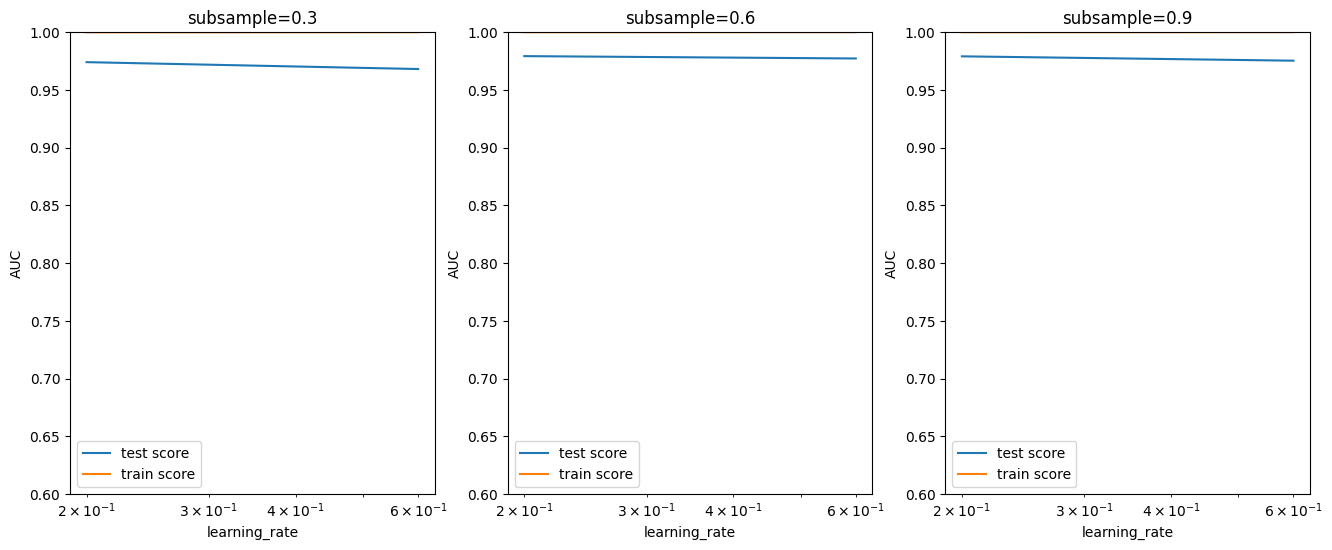

In [68]:
param_grid = {'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]}
plot_subsample_results(cv_results, param_grid['subsample'])

In [69]:
model_cv.best_params_


{'learning_rate': 0.2, 'subsample': 0.6}

In [70]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [71]:

y_train_pred = xgb_imb_model.predict(X_train)

In [72]:
calculate_classification_metrics(y_train, y_train_pred)


Confusion Matrix:
[[199020      0]
 [     0    344]]

Accuracy: 1.0000
Sensitivity (True Positive Rate): 1.0000
Specificity (True Negative Rate): 1.0000
F1 Score: 1.0000


In [73]:
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]



In [74]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

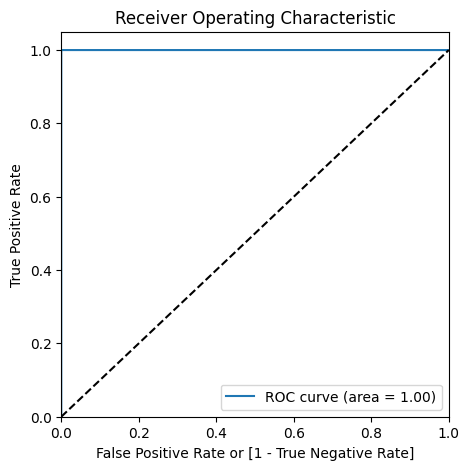

In [75]:
plot_roc_curve(y_train, y_train_pred_proba_imb_xgb)


### Prediction on the test set

In [76]:
y_test_pred = xgb_imb_model.predict(X_test)




In [77]:
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[85285    10]
 [   35   113]]

Accuracy: 0.9995
Sensitivity (True Positive Rate): 0.7635
Specificity (True Negative Rate): 0.9999
F1 Score: 0.8339


In [78]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [79]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9688993524857292

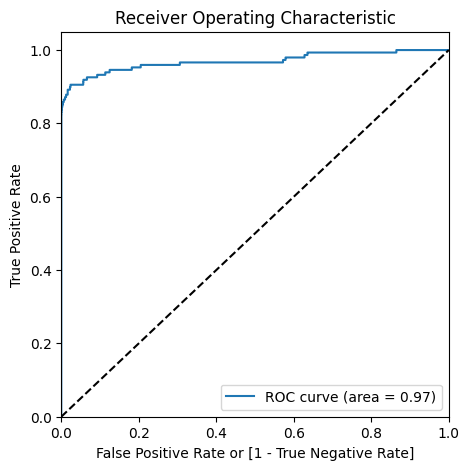

In [80]:
plot_roc_curve(y_test, y_test_pred_proba)


Model summary (xGBoost)

Train set

*   Accuracy = 0.99
*   Sensitivity = 0.62
*   Specificity = 0.99
*   F1-Score = 0.99
*   ROC = 0.99


Test set

*   Accuracy = 0.99
*   Sensitivity = 0.76
*   Specificity = 0.99
*   F1-Score = 0.83
*   ROC = 0.97


Model is seemingly well performing on test set as well.

#Random Forest

In [240]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 8],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [50, 100],
    'n_estimators': [50, 100],
    'max_features': [5, 10]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_search.fit(X_train, y_train)

In [84]:
grid_search.best_score_


In [85]:
print("Best Hyperparameters:", grid_search.best_params_)

#Selecting the optimal model for the imbalanced dataset

* Upon evaluating various models, including Logistic Regression, XGBoost, Decision Tree, and Random Forest, it is evident that each model has demonstrated commendable performance.
* Notably, Logistic Regression and XGBoost outperformed others, showcasing the highest ROC-AUC scores.

* When considering the selection of a single model, the preference leans
towards XGBoost. As it is giving us ROC score of 1.0 on the train data and 0.97 on the test data.

#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [83]:
# clf = ___  #initialise the model with optimum hyperparameters
# clf.fit(X_train, y_train)
# print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 12


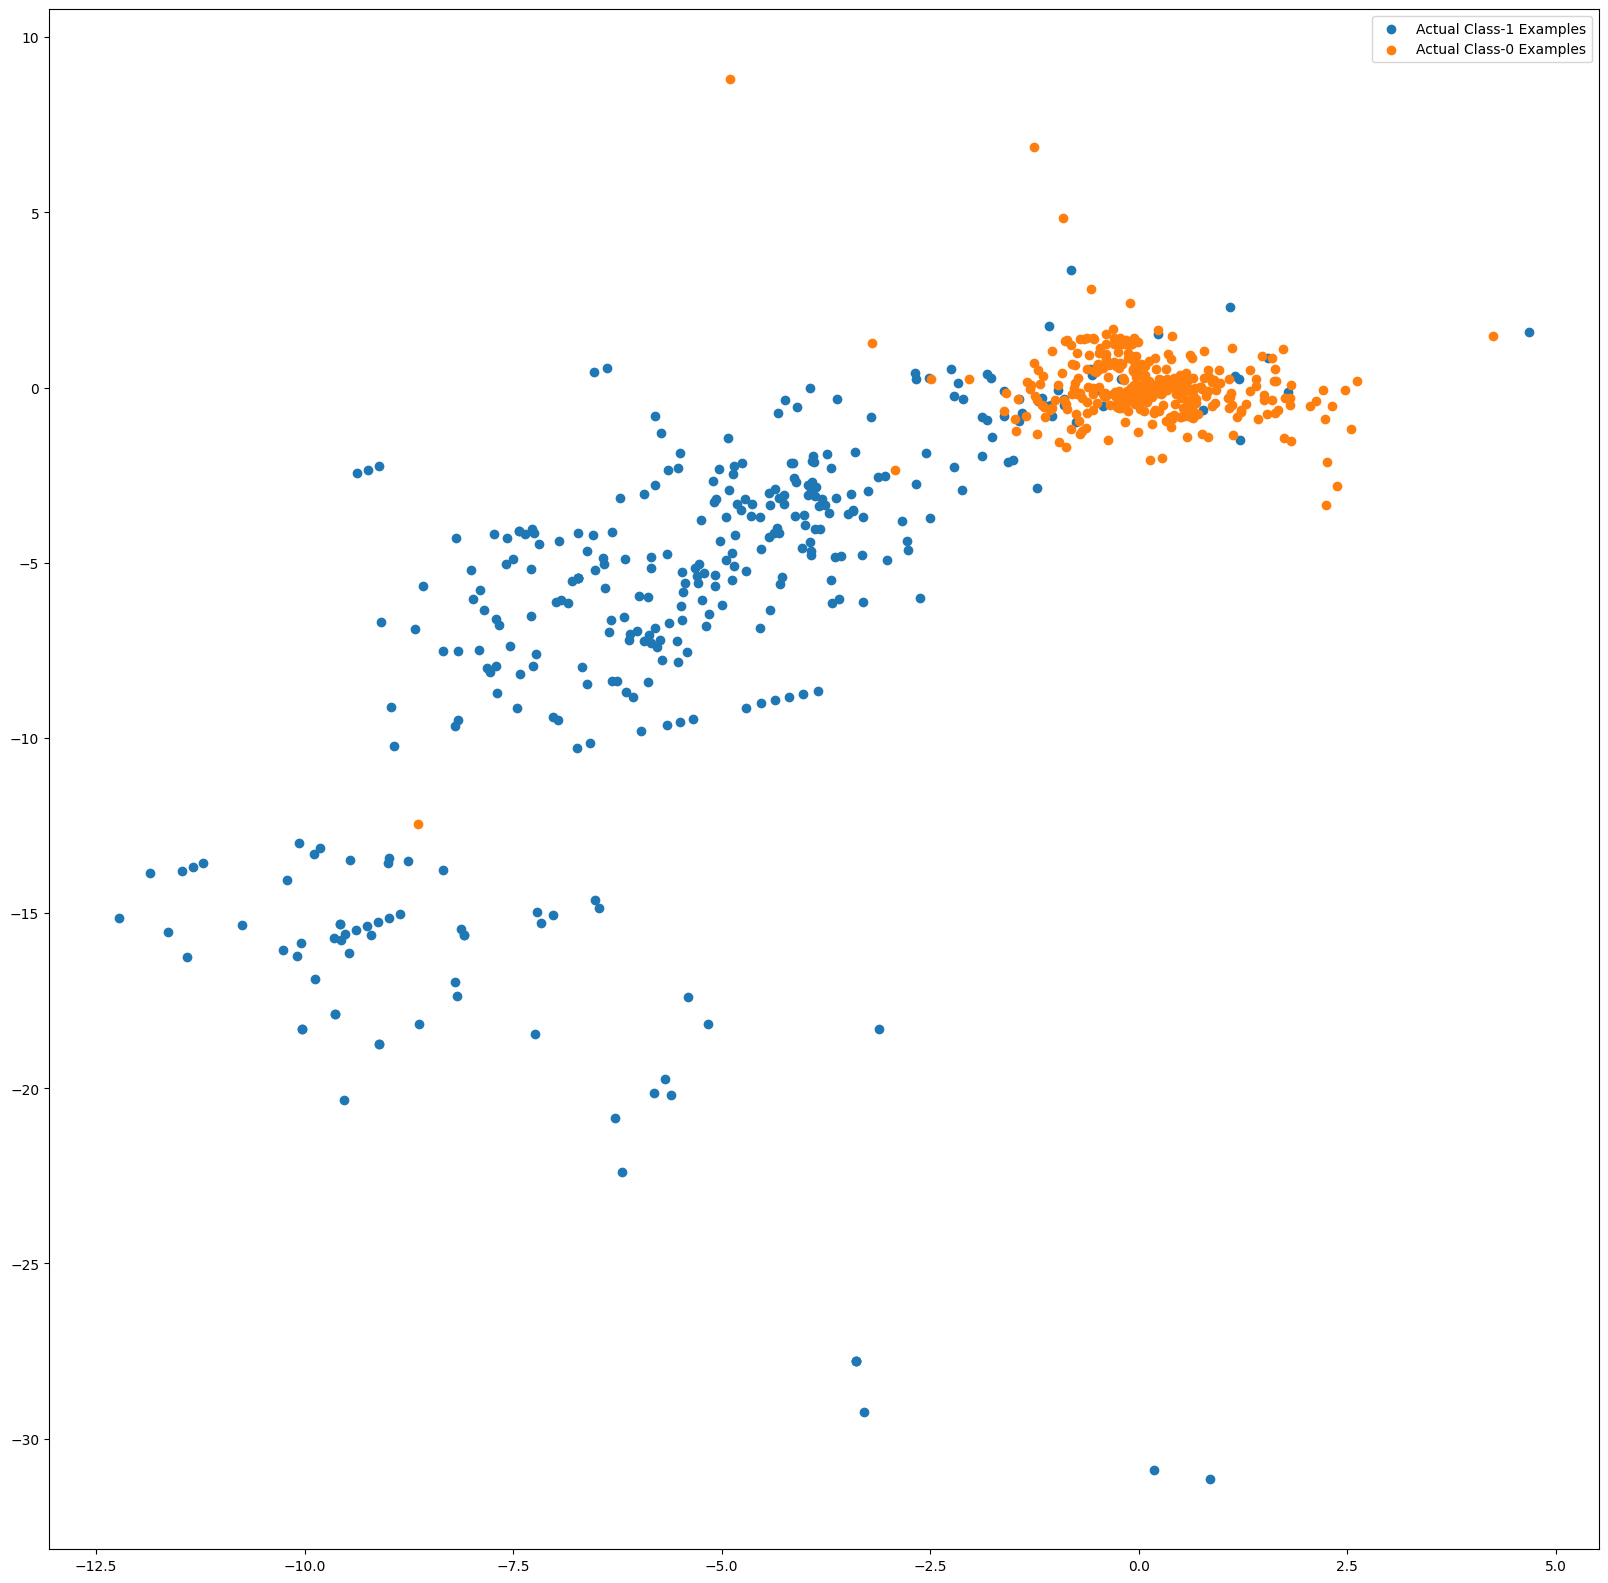

In [82]:
var_imp = []
clf = xgb_imb_model
#xgb_imb_model

for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [140]:
# # Logistic Regression
# from sklearn import linear_model #import the package

# num_C = ______  #--> list of values
# cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

### Random Oversampling

In [86]:

from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from xgboost import XGBClassifier

# Step 1: Split the data into training and testing sets
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Perform cross-validation & balance classes using Random Oversampling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ros = RandomOverSampler(random_state=42)

X_train_cv_resampled, y_train_cv_resampled = ros.fit_resample(X_train_cv, y_train_cv)

# Step 3: Hyperparameter tuning using GridSearchCV with a reduced parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

xgb = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=scorer, cv=cv, verbose=1, n_jobs=-1)
grid_search.fit(X_train_cv_resampled, y_train_cv_resampled)

# Step 4: Print evaluation results with optimum hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the test set
y_pred_proba = grid_search.predict_proba(X_test_cv)[:, 1]
roc_auc_test = roc_auc_score(y_test_cv, y_pred_proba)

print("ROC-AUC on the test set:", roc_auc_test)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
ROC-AUC on the test set: 0.991090690997588


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE

In [87]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

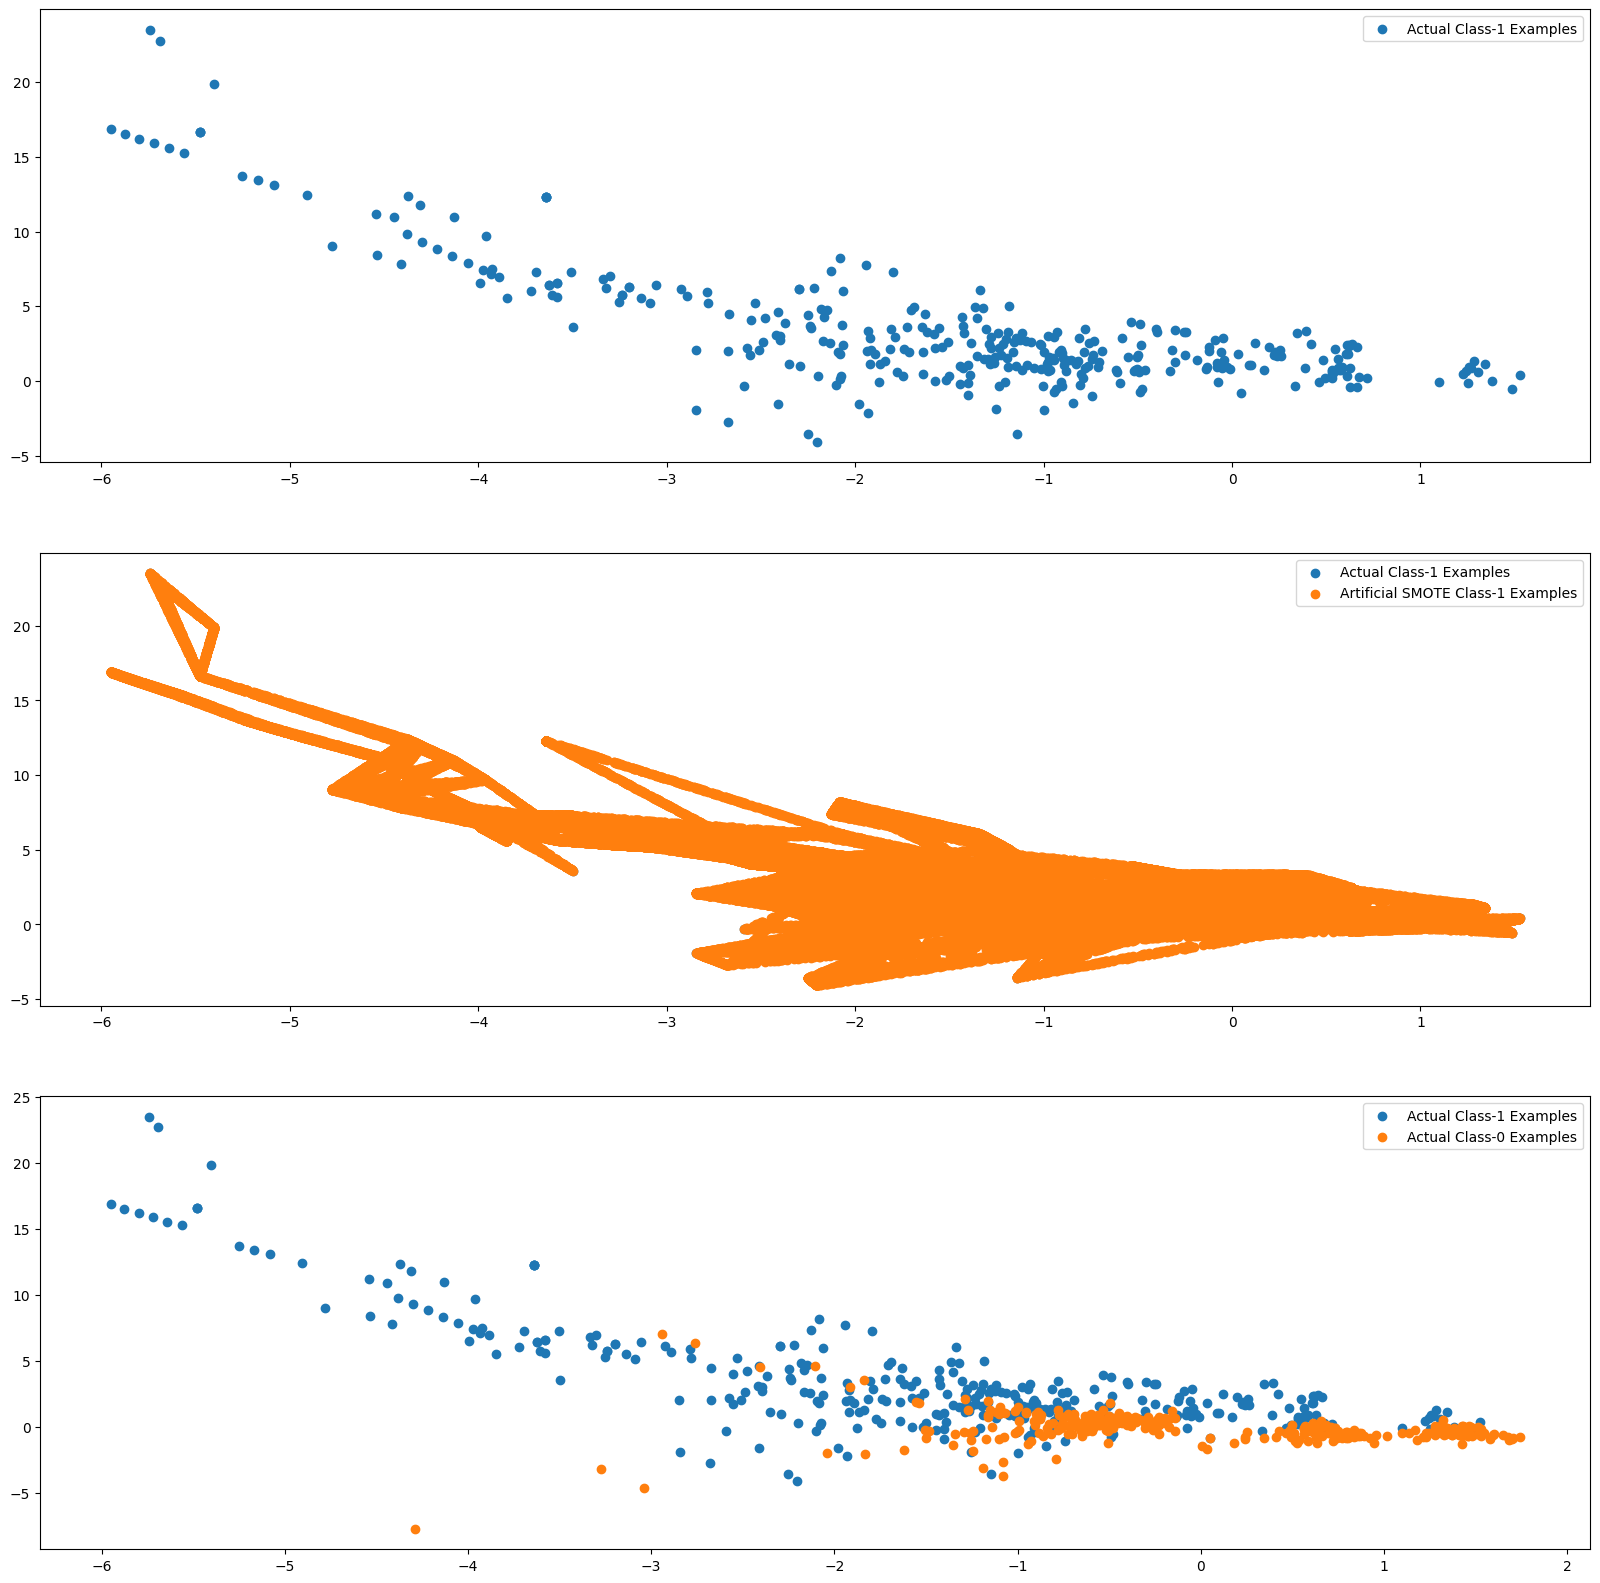

In [88]:

import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Extract minority class examples from original and SMOTE data
X_train_1 = X_train[y_train == 1].to_numpy()
X_train_smote_1 = X_train_smote[y_train_smote == 1].to_numpy()

# Plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig, axes = plt.subplots(3, 1)

# Plot Actual Class-1 Examples
axes[0].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axes[0].legend()

# Plot Actual and Artificial SMOTE Class-1 Examples
axes[1].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axes[1].scatter(X_train_smote_1[:, 0], X_train_smote_1[:, 1], label='Artificial SMOTE Class-1 Examples')
axes[1].legend()

# Extract minority and majority class examples from original data
X_train_0 = X_train[y_train == 0].to_numpy()

# Plot Actual Class-1 Examples and Actual Class-0 Examples
axes[2].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axes[2].scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
axes[2].legend()

plt.show()


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

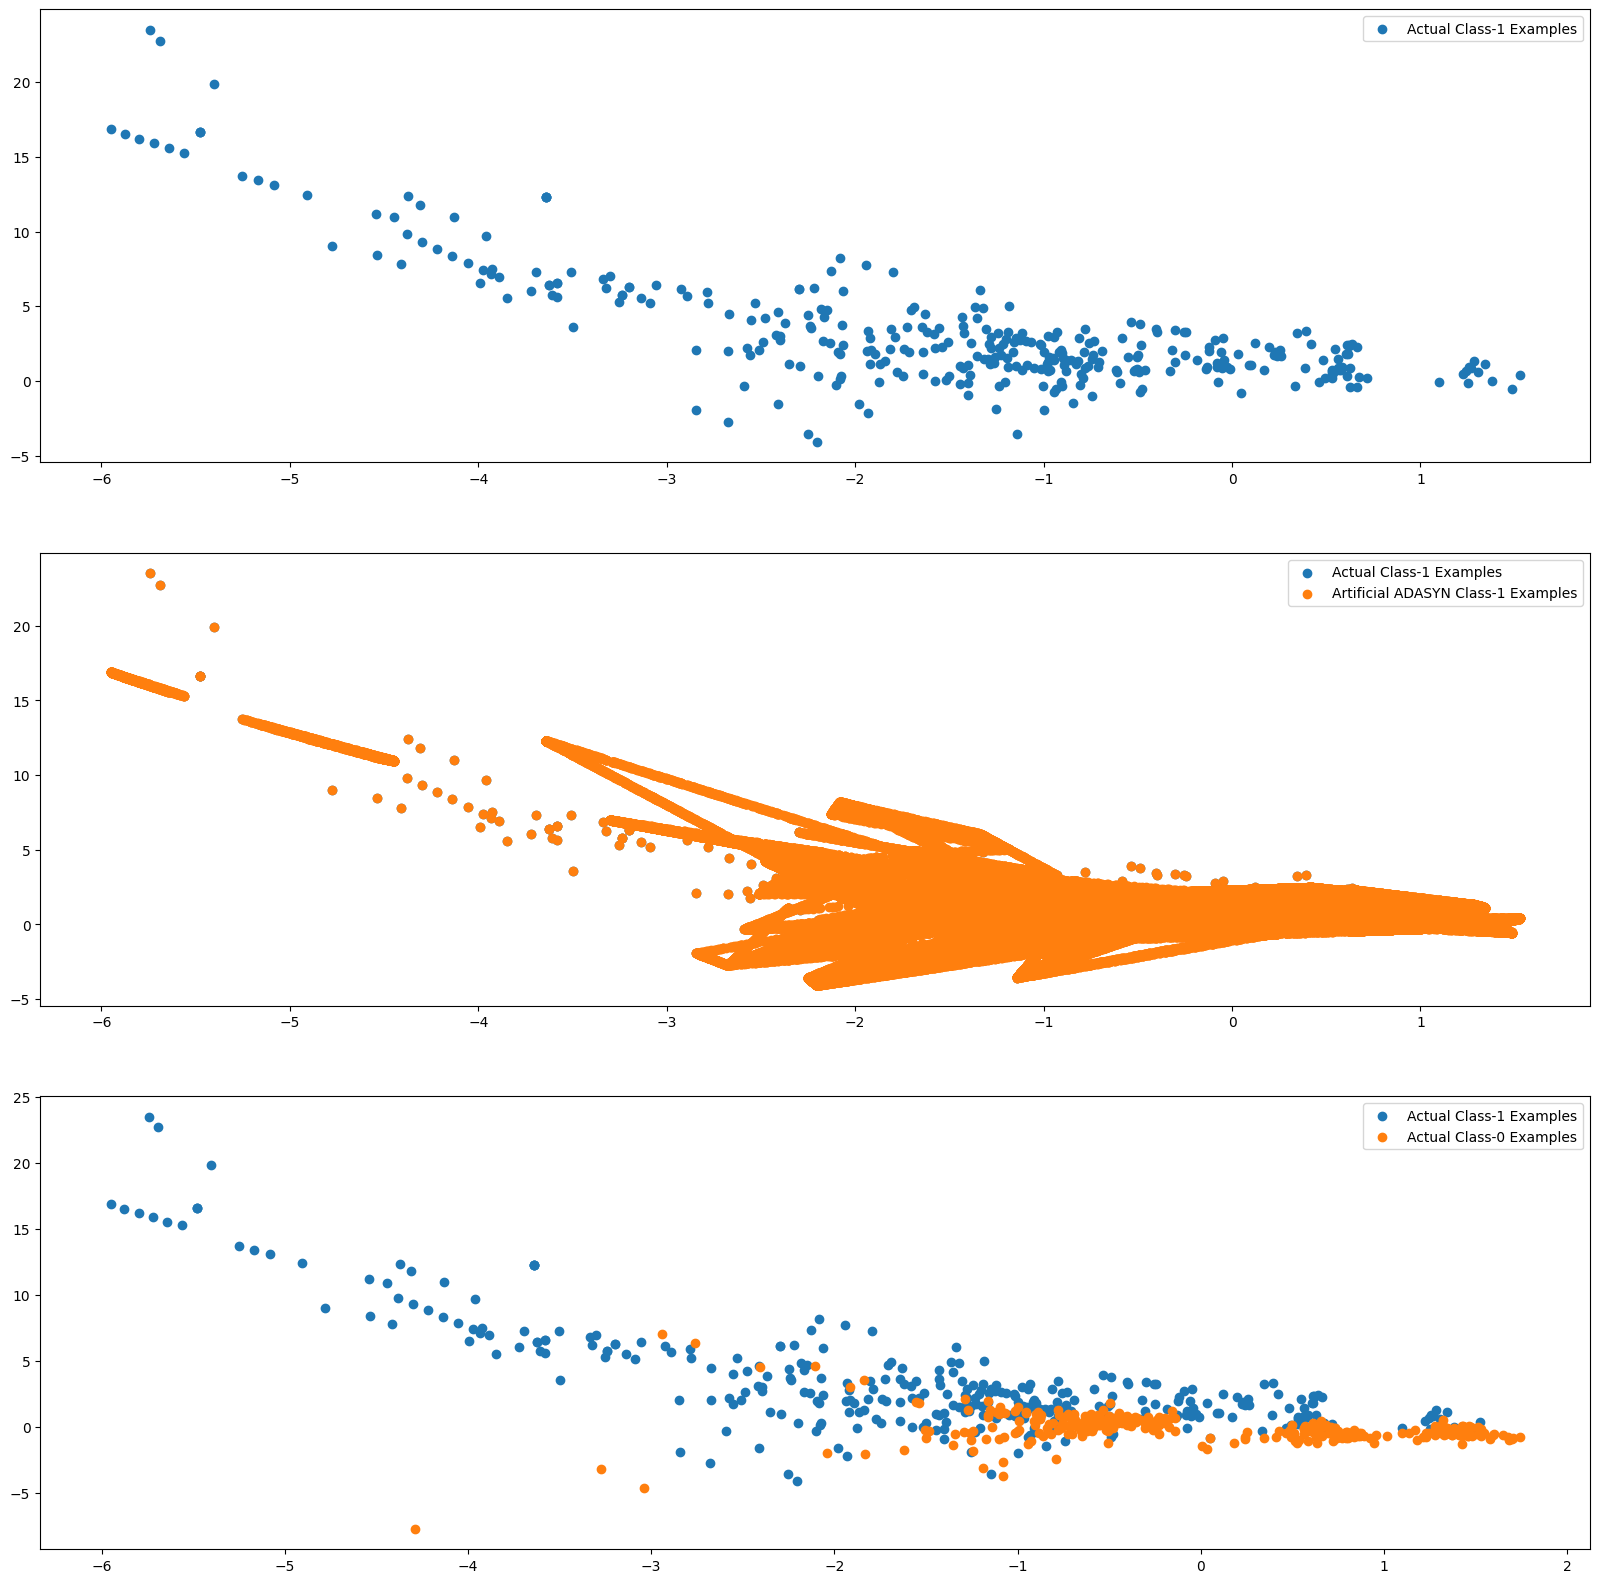

In [89]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Extract minority class examples from original and ADASYN data
X_train_1 = X_train[y_train == 1].to_numpy()
X_train_adasyn_1 = X_train_adasyn[y_train_adasyn == 1].to_numpy()

# Plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig, axes = plt.subplots(3, 1)

# Plot Actual Class-1 Examples
axes[0].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axes[0].legend()

# Plot Actual Class-1 Examples and Artificial ADASYN Class-1 Examples
axes[1].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axes[1].scatter(X_train_adasyn_1[:, 0], X_train_adasyn_1[:, 1], label='Artificial ADASYN Class-1 Examples')
axes[1].legend()

# Extract minority and majority class examples from original data
X_train_0 = X_train[y_train == 0].to_numpy()

# Plot Actual Class-1 Examples and Actual Class-0 Examples
axes[2].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axes[2].scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
axes[2].legend()

plt.show()


#SMOTE

In [134]:
from imblearn.over_sampling import SMOTE


In [141]:
# instantiate SMOTE
sm = SMOTE(random_state=27)

# fitting the SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [142]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (199364, 29)
After SMOTE oversampling X_train shape= (398040, 29)


##Logistic Regression with SMOTE


In [143]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [144]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.596798,0.190353,0.050951,0.022515,0.01,{'C': 0.01},0.992176,0.992258,0.991855,0.992450,...,0.992207,0.000197,6,0.992239,0.992209,0.992294,0.992124,0.992203,0.992214,0.000055
1,2.160137,0.679041,0.053430,0.032782,0.1,{'C': 0.1},0.992294,0.992371,0.991976,0.992564,...,0.992321,0.000194,5,0.992353,0.992325,0.992408,0.992241,0.992319,0.992329,0.000054
2,2.087952,0.681437,0.044940,0.014258,1,{'C': 1},0.992308,0.992384,0.991988,0.992578,...,0.992334,0.000194,4,0.992365,0.992338,0.992420,0.992254,0.992332,0.992342,0.000054
3,1.825022,0.452657,0.043870,0.011428,10,{'C': 10},0.992309,0.992385,0.991990,0.992579,...,0.992336,0.000194,3,0.992367,0.992339,0.992421,0.992255,0.992333,0.992343,0.000054
4,1.751411,0.436526,0.045863,0.014721,100,{'C': 100},0.992309,0.992385,0.991990,0.992579,...,0.992336,0.000194,1,0.992367,0.992339,0.992422,0.992256,0.992333,0.992343,0.000054
5,1.979846,0.559014,0.050220,0.015693,1000,{'C': 1000},0.992309,0.992385,0.991990,0.992579,...,0.992336,0.000194,2,0.992367,0.992339,0.992422,0.992255,0.992333,0.992343,0.000054


In [145]:
import matplotlib.pyplot as plt

def plot_cv_results(cv_results):
    """
    Plot mean test and train scores against the parameter values.

    Parameters:
    - cv_results: The result of cross-validated grid search.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
    plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
    plt.xlabel('C')
    plt.ylabel('roc_auc')
    plt.legend(['test result', 'train result'], loc='upper left')
    plt.xscale('log')
    plt.show()


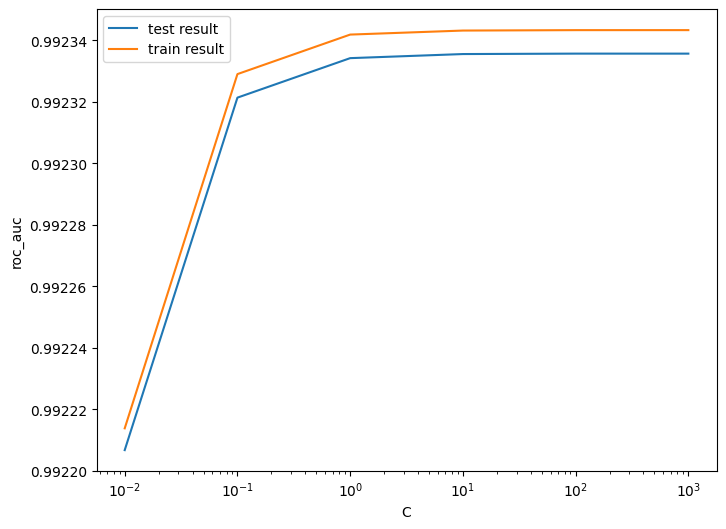

In [146]:
plot_cv_results(cv_results)


In [147]:
print(model_cv.best_score_)
print(model_cv.best_params_['C'])

0.992335667572387
100


In [149]:
# Fit the model with train set
logistic_bal_smote = LogisticRegression(C=100)
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

#Predict
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)


In [150]:

calculate_classification_metrics(y_train_smote, y_train_pred)

Confusion Matrix:
[[194232   4788]
 [ 12078 186942]]

Accuracy: 0.9576
Sensitivity (True Positive Rate): 0.9393
Specificity (True Negative Rate): 0.9759
F1 Score: 0.9568


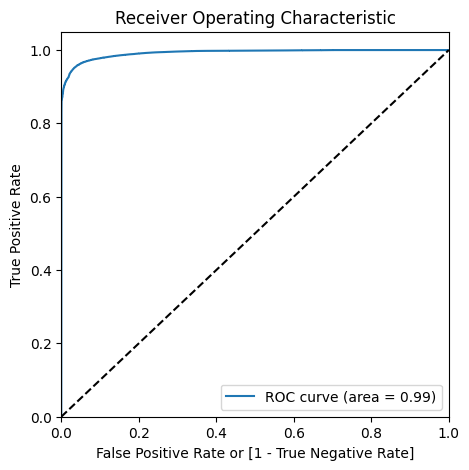

In [151]:
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]
plot_roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)


In [152]:
#Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)
calculate_classification_metrics(y_test, y_test_pred)



Confusion Matrix:
[[83537  1758]
 [   18   130]]

Accuracy: 0.9792
Sensitivity (True Positive Rate): 0.8784
Specificity (True Negative Rate): 0.9794
F1 Score: 0.1277


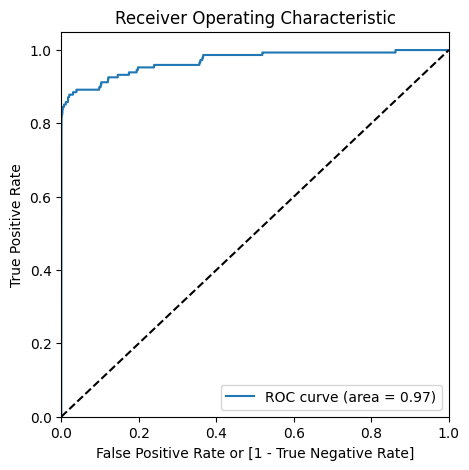

In [153]:
#ROC in Test Data
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_test_pred_proba)


Model summary (Logistric With SMOTE)

Train set

*   Accuracy = 0.95
*   Sensitivity = 0.93
*   Specificity = 0.97
*   ROC = 0.99


Test set

*   Accuracy = 0.97
*   Sensitivity = 0.87
*   Specificity = 0.97
*   ROC = 0.97





#XGBoost With SMOTE


In [159]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [160]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.370074,1.101265,0.214593,0.047660,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999768,0.999742,0.999755,0.999755,0.000011,4,0.999776,0.999794,0.999785,0.999785,0.000008
1,6.666951,1.412263,0.193540,0.005343,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999756,0.999724,0.999749,0.999743,0.000014,5,0.999770,0.999775,0.999769,0.999771,0.000003
2,5.189015,0.874061,0.228515,0.061462,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999729,0.999703,0.999742,0.999724,0.000016,6,0.999744,0.999775,0.999764,0.999761,0.000013
3,5.752808,1.439349,0.181425,0.001916,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999971,0.999936,0.999959,0.999955,0.000015,1,0.999983,0.999985,0.999979,0.999982,0.000003
4,6.807166,1.474696,0.222654,0.060967,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999968,0.999933,0.999964,0.999955,0.000016,2,0.999982,0.999990,0.999983,0.999985,0.000004
5,5.322341,1.161205,0.199454,0.019715,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999961,0.999945,0.999958,0.999955,0.000007,3,0.999983,0.999984,0.999988,0.999985,0.000002


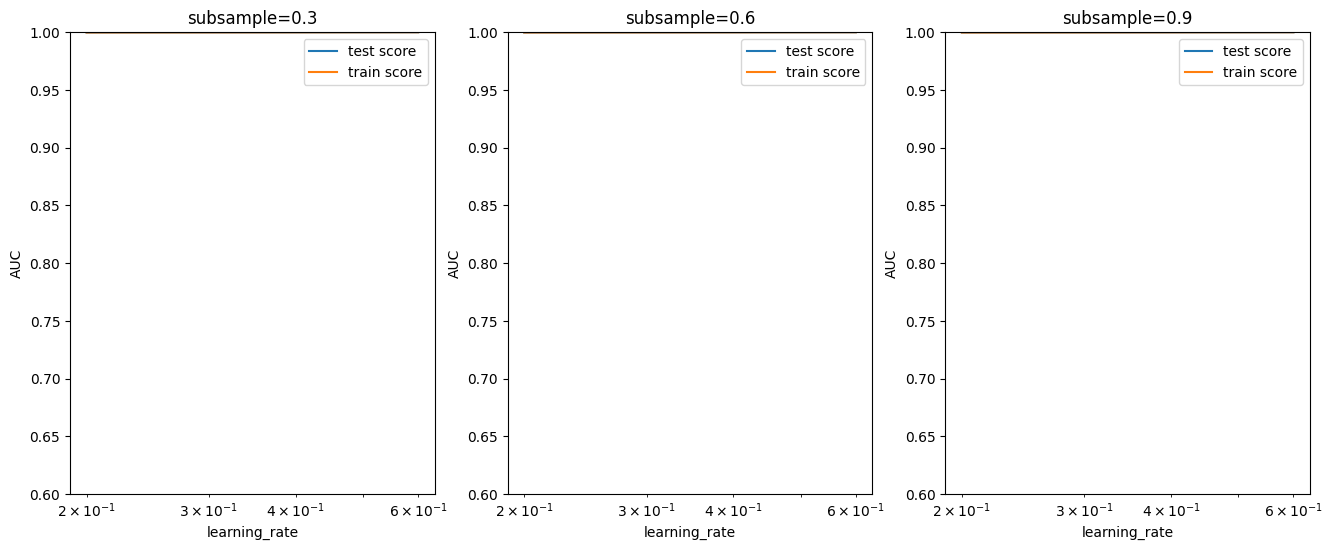

In [161]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

In [163]:
model_cv.best_params_


{'learning_rate': 0.6, 'subsample': 0.3}

In [164]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

In [165]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [166]:
calculate_classification_metrics(y_train_smote, y_train_pred)


Confusion Matrix:
[[199020      0]
 [     0 199020]]

Accuracy: 1.0000
Sensitivity (True Positive Rate): 1.0000
Specificity (True Negative Rate): 1.0000
F1 Score: 1.0000


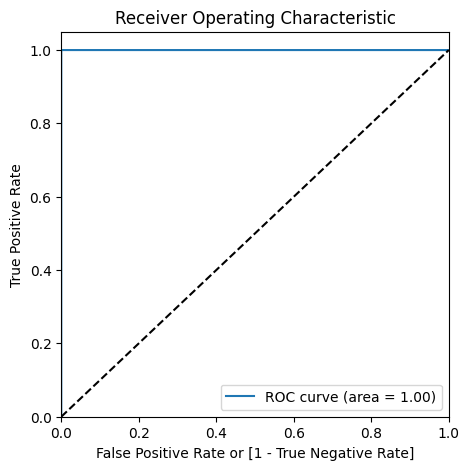

In [167]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]
plot_roc_curve(y_train_smote, y_train_pred_proba)


####Prediction on the test set



In [168]:
y_test_pred = xgb_bal_smote_model.predict(X_test)


In [169]:
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[85272    23]
 [   31   117]]

Accuracy: 0.9994
Sensitivity (True Positive Rate): 0.7905
Specificity (True Negative Rate): 0.9997
F1 Score: 0.8125


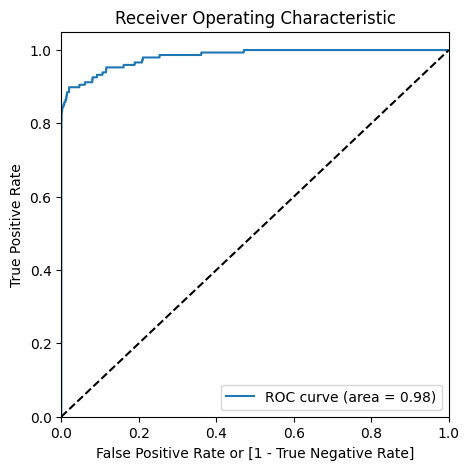

In [170]:
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_test_pred_proba)



Model summary (XG BOOST With SMOTE)

Train set

*   Accuracy = 1
*   Sensitivity = 1
*   Specificity = 1
*   ROC = 1


Test set

*   Accuracy = 0.99
*   Sensitivity = 0.79
*   Specificity = 0.99
*   ROC = 0.98

#Decision Tree with SMOTE


In [171]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)
#fit
grid_search.fit(X_train_smote,y_train_smote)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [172]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.078429,0.074757,0.060407,0.002138,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.991320,0.990866,0.991293,0.991160,0.000208,7
1,6.332076,0.513611,0.037851,0.000975,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.991320,0.990866,0.991279,0.991155,0.000205,8
2,6.131975,0.508566,0.044654,0.010253,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.991431,0.990942,0.991322,0.991232,0.000210,6
3,6.093559,0.427392,0.044485,0.011323,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.991431,0.990942,0.991325,0.991233,0.000210,5
4,11.708084,0.136288,0.048084,0.010321,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998415,0.998407,0.998692,0.998505,0.000132,2
5,11.400993,0.612466,0.040677,0.000839,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998435,0.998447,0.998678,0.998520,0.000112,1
6,11.287246,0.452379,0.046156,0.009780,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998412,0.998477,0.998486,0.998458,0.000033,3
7,11.426407,0.375545,0.047125,0.009298,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998386,0.998498,0.998481,0.998455,0.000050,4


In [173]:
grid_search.best_score_


0.9985199482286841

In [174]:
grid_search.best_estimator_


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)

In [175]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [176]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [177]:
calculate_classification_metrics(y_train_smote, y_train_pred)

Confusion Matrix:
[[195552   3468]
 [  1610 197410]]

Accuracy: 0.9872
Sensitivity (True Positive Rate): 0.9919
Specificity (True Negative Rate): 0.9826
F1 Score: 0.9873


In [178]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

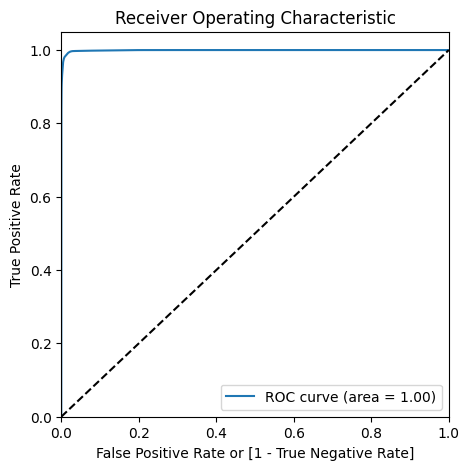

In [179]:
plot_roc_curve(y_train_smote, y_train_pred_proba)

####Prediction on the test set



In [180]:
y_test_pred = dt_bal_smote_model.predict(X_test)


In [181]:
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[83789  1506]
 [   29   119]]

Accuracy: 0.9820
Sensitivity (True Positive Rate): 0.8041
Specificity (True Negative Rate): 0.9823
F1 Score: 0.1342


In [182]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

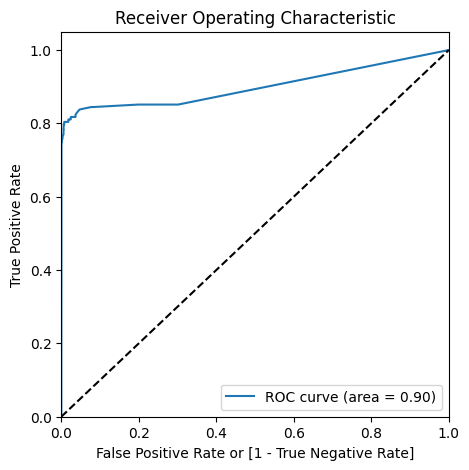

In [183]:
plot_roc_curve(y_test, y_test_pred_proba)

Model summary (Decision Tree With SMOTE)

Train set

*   Accuracy = 0.98
*   Sensitivity = 0.99
*   Specificity = 0.98
*   ROC = 1

Test set

*   Accuracy = 0.98
*   Sensitivity = 0.80
*   Specificity = 0.98
*   ROC = 0.90


##With SMOTE XGBOOST is Performing very well with below Metrics compare to other Models

Test set

*   Accuracy = 0.99
*   Sensitivity = 0.79
*   Specificity = 0.99
*   ROC = 0.98

#ADASYN

In [184]:
# importing adasyn
from imblearn.over_sampling import ADASYN


In [185]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [186]:
from collections import Counter

# Before sampling class distribution
print('Before sampling class distribution:', Counter(y_train))

# New class distribution
print('New class distribution:', Counter(y_train_adasyn))

Before sampling class distribution: Counter({0: 199020, 1: 344})
New class distribution: Counter({1: 199035, 0: 199020})


##ADASYN and  Logistic Regression




In [187]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [188]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.332014,0.173702,0.134244,0.012563,0.01,{'C': 0.01},0.971577,0.971037,0.971380,0.971331,0.000223,6,0.971371,0.971379,0.971332,0.971361,0.000021
1,1.280939,0.022768,0.056986,0.000820,0.1,{'C': 0.1},0.971852,0.971298,0.971661,0.971604,0.000230,5,0.971632,0.971645,0.971630,0.971635,0.000007
2,2.015066,0.264124,0.097396,0.030109,1,{'C': 1},0.971872,0.971319,0.971687,0.971626,0.000230,4,0.971652,0.971665,0.971657,0.971658,0.000006
3,1.907175,0.388386,0.063822,0.003330,10,{'C': 10},0.971874,0.971322,0.971689,0.971628,0.000230,3,0.971653,0.971667,0.971660,0.971660,0.000006
4,1.376536,0.119359,0.056929,0.000758,100,{'C': 100},0.971874,0.971322,0.971690,0.971628,0.000230,2,0.971653,0.971667,0.971660,0.971660,0.000006
5,1.432309,0.210924,0.083317,0.025575,1000,{'C': 1000},0.971874,0.971322,0.971690,0.971628,0.000230,1,0.971653,0.971668,0.971660,0.971660,0.000006


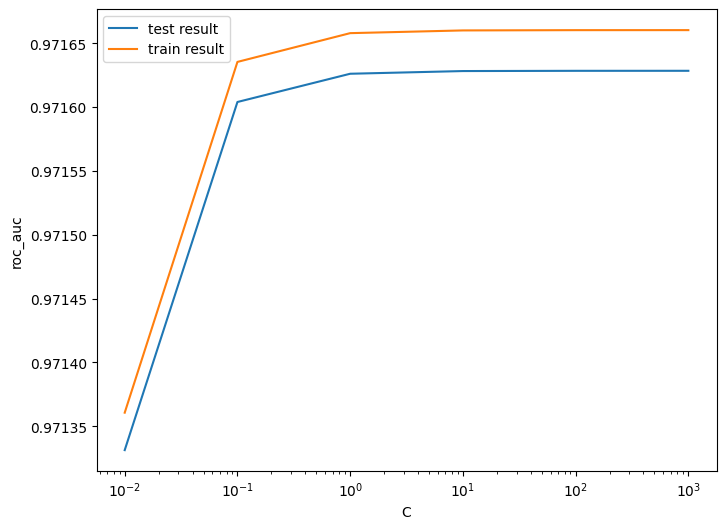

In [189]:
plot_cv_results(cv_results)


In [190]:
print(model_cv.best_score_)
print(model_cv.best_params_)

0.9716284001143537
{'C': 1000}


####Logistic regression with optimal C



In [191]:
logistic_bal_adasyn = LogisticRegression(C=1000)
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

####Prediction on the train set



In [192]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [193]:
calculate_classification_metrics(y_train_adasyn, y_train_pred)

Confusion Matrix:
[[183427  15593]
 [ 20932 178103]]

Accuracy: 0.9082
Sensitivity (True Positive Rate): 0.8948
Specificity (True Negative Rate): 0.9217
F1 Score: 0.9070


In [194]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [195]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9716572242877733

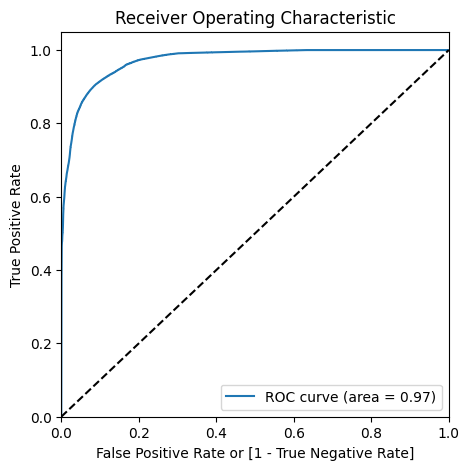

In [196]:
# Plot the ROC curve
plot_roc_curve(y_train_adasyn, y_train_pred_proba)

####Prediction on the test set



In [197]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [198]:
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[80300  4995]
 [   16   132]]

Accuracy: 0.9414
Sensitivity (True Positive Rate): 0.8919
Specificity (True Negative Rate): 0.9414
F1 Score: 0.0500


In [199]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]


In [200]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9710562150755011

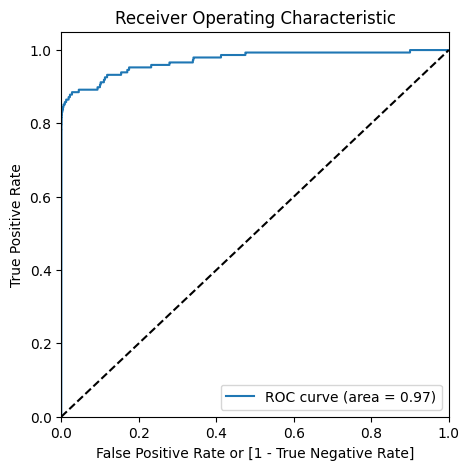

In [201]:
# Plot the ROC curve
plot_roc_curve(y_test, y_test_pred_proba)

Model summary (Logistic regression  With ADASYN)

Train set

*   Accuracy = 0.90
*   Sensitivity = 0.89
*   Specificity = 0.92
*   ROC = 0.97

Test set

*   Accuracy = 0.94
*   Sensitivity = 0.89
*   Specificity = 0.94
*   ROC = 0.97


#ADASYN and XGBoost


In [202]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [203]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.655622,1.520740,0.287221,0.078272,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.993069,0.973895,0.982416,0.983126,0.007844,6,0.999345,0.999395,0.999451,0.999397,0.000044
1,7.193864,2.176228,0.196425,0.005955,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.992996,0.978796,0.983006,0.984933,0.005955,3,0.999376,0.999457,0.999469,0.999434,0.000041
2,7.534551,2.373366,0.262522,0.053161,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.991209,0.979109,0.982608,0.984309,0.005084,5,0.999230,0.999392,0.999476,0.999366,0.000102
3,5.276821,1.273129,0.194674,0.007191,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.993245,0.983393,0.986213,0.987617,0.004143,1,0.999956,0.999964,0.999961,0.999960,0.000003
4,5.375290,1.446434,0.193463,0.006856,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.988765,0.981977,0.983889,0.984877,0.002858,4,0.999955,0.999967,0.999968,0.999963,0.000006
5,5.026858,0.562827,0.230186,0.047641,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.991954,0.977904,0.989933,0.986597,0.006202,2,0.999961,0.999968,0.999975,0.999968,0.000006


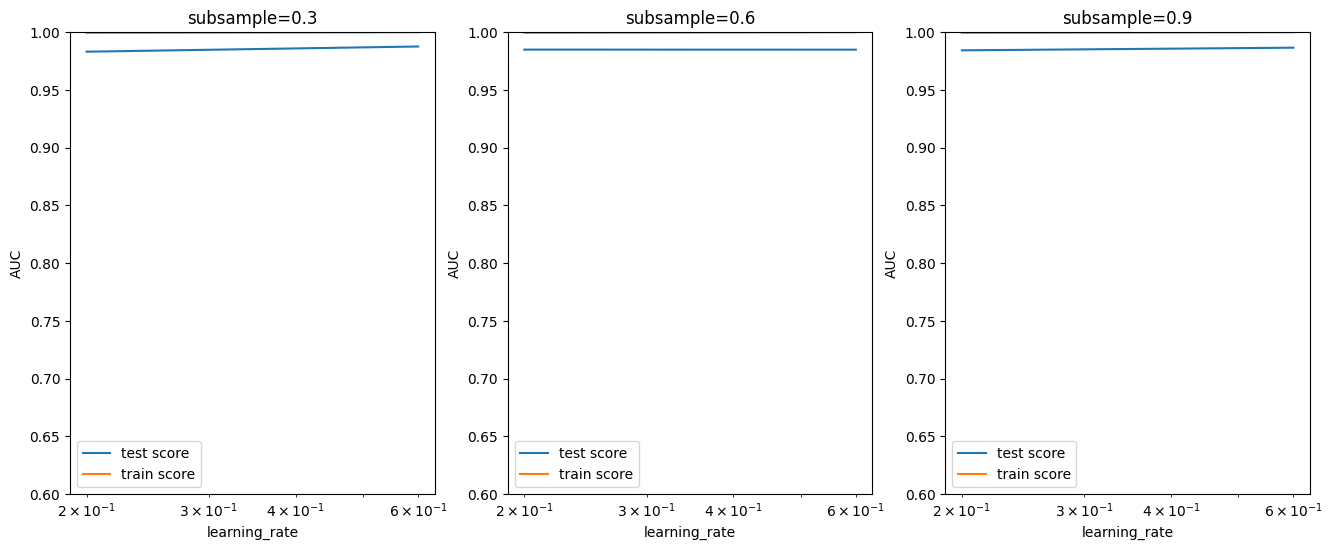

In [204]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

In [205]:
model_cv.best_params_


{'learning_rate': 0.6, 'subsample': 0.3}

In [206]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

####Prediction on the train set



In [207]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [208]:
calculate_classification_metrics(y_train_adasyn, y_train_adasyn)

Confusion Matrix:
[[199020      0]
 [     0 199035]]

Accuracy: 1.0000
Sensitivity (True Positive Rate): 1.0000
Specificity (True Negative Rate): 1.0000
F1 Score: 1.0000


In [209]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [210]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

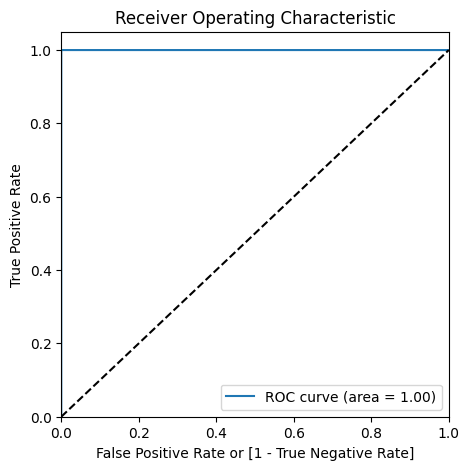

In [211]:
plot_roc_curve(y_train_adasyn, y_train_pred_proba)

####Prediction on the test set



In [212]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [213]:
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[85276    19]
 [   30   118]]

Accuracy: 0.9994
Sensitivity (True Positive Rate): 0.7973
Specificity (True Negative Rate): 0.9998
F1 Score: 0.8281


In [234]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [235]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.977789008892825

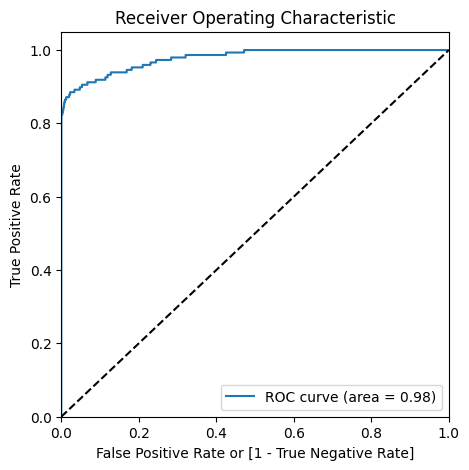

In [216]:
# Plot the ROC curve
plot_roc_curve(y_test, y_test_pred_proba)

Model summary (XGBoost With ADASYN)

Train set

*   Accuracy = 1
*   Sensitivity = 1
*   Specificity = 1
*   ROC = 1

Test set

*   Accuracy = 0.99
*   Sensitivity = 0.79
*   Specificity = 0.99
*   ROC = 0.98

#ADASYN and Decision Tree


In [217]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [218]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.226342,0.282359,0.042862,0.009020,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933534,0.927093,0.932574,0.931067,0.002837,6
1,7.567868,0.368875,0.053449,0.012639,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933534,0.920038,0.932384,0.928652,0.006109,8
2,6.955316,0.643068,0.048867,0.008914,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.936123,0.924704,0.932388,0.931072,0.004754,5
3,8.338473,1.740195,0.089099,0.038751,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.937280,0.924167,0.932388,0.931278,0.005410,4
4,13.683183,1.071542,0.055242,0.015137,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924009,0.948487,0.919085,0.930527,0.012858,7
5,11.954137,0.583111,0.056979,0.016138,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924284,0.948868,0.921417,0.931523,0.012321,3
6,12.954912,1.861472,0.045926,0.012002,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.930131,0.949815,0.928524,0.936157,0.009680,1
7,12.477913,2.173044,0.052106,0.010617,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932808,0.946769,0.927609,0.935729,0.008090,2


In [219]:
grid_search.best_score_


0.9361566461629277

In [220]:
grid_search.best_estimator_


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

In [221]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [222]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [223]:
calculate_classification_metrics(y_train_adasyn, y_train_pred)

Confusion Matrix:
[[191468   7552]
 [  1262 197773]]

Accuracy: 0.9779
Sensitivity (True Positive Rate): 0.9937
Specificity (True Negative Rate): 0.9621
F1 Score: 0.9782


In [224]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [225]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9930926085006726

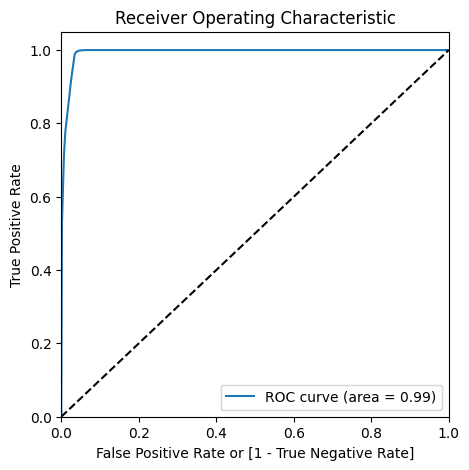

In [226]:
plot_roc_curve(y_train_adasyn, y_train_pred_proba)


####Prediction on the test set



In [227]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [228]:
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix:
[[82011  3284]
 [   23   125]]

Accuracy: 0.9613
Sensitivity (True Positive Rate): 0.8446
Specificity (True Negative Rate): 0.9615
F1 Score: 0.0703


In [229]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [230]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9274619642797729

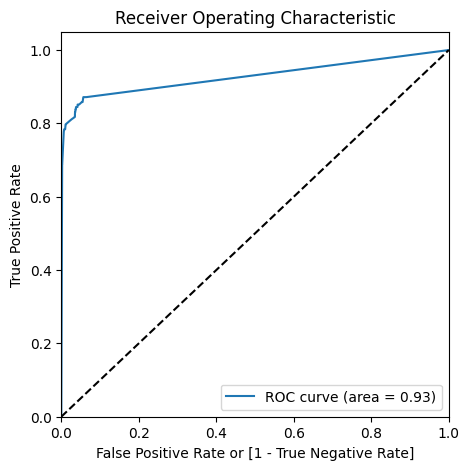

In [231]:
# Plot the ROC curve
plot_roc_curve(y_test, y_test_pred_proba)

Model summary (Decision Tree With ADASYN)

Train set

*   Accuracy = 0.97
*   Sensitivity = 0.99
*   Specificity = 0.96
*   ROC = 1


Test set

*   Accuracy = 0.96
*   Sensitivity = 0.84
*   Specificity = 0.96
*   ROC = 0.93

#Final summary



1.   Data Balancing Techniques:

> *   Balanced the dataset using two effective techniques: SMOTE and ADASYN.
> *   Implemented several models, including Logistic Regression and XGBoost, for each balancing technique.

2.   Model Performance:

> *   **After ASYSN:**
>> *   Logistic Regression achieved a ROC score of 0.97.
>> *   XGBoost achieved a ROC score of 0.98.

> *   **After SMOTE:**
>> *   Logistic Regression achieved a ROC score of 0.97.
>> *   XGBoost achieved a ROC score of 0.98.

3.   Best Model Selection:
> *   Considering the ROC scores after both ADASYN and SMOTE, XGBoost consistently performed well.
> *   Therefore, XGBoost is considered the optimal choice for its strong performance across different data balancing techniques.

**Conclusion:**

Concluded that XGBoost is the optimal model choice, demonstrating consistent high performance across both ADASYN and SMOTE, making it a robust choice for the dataset.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


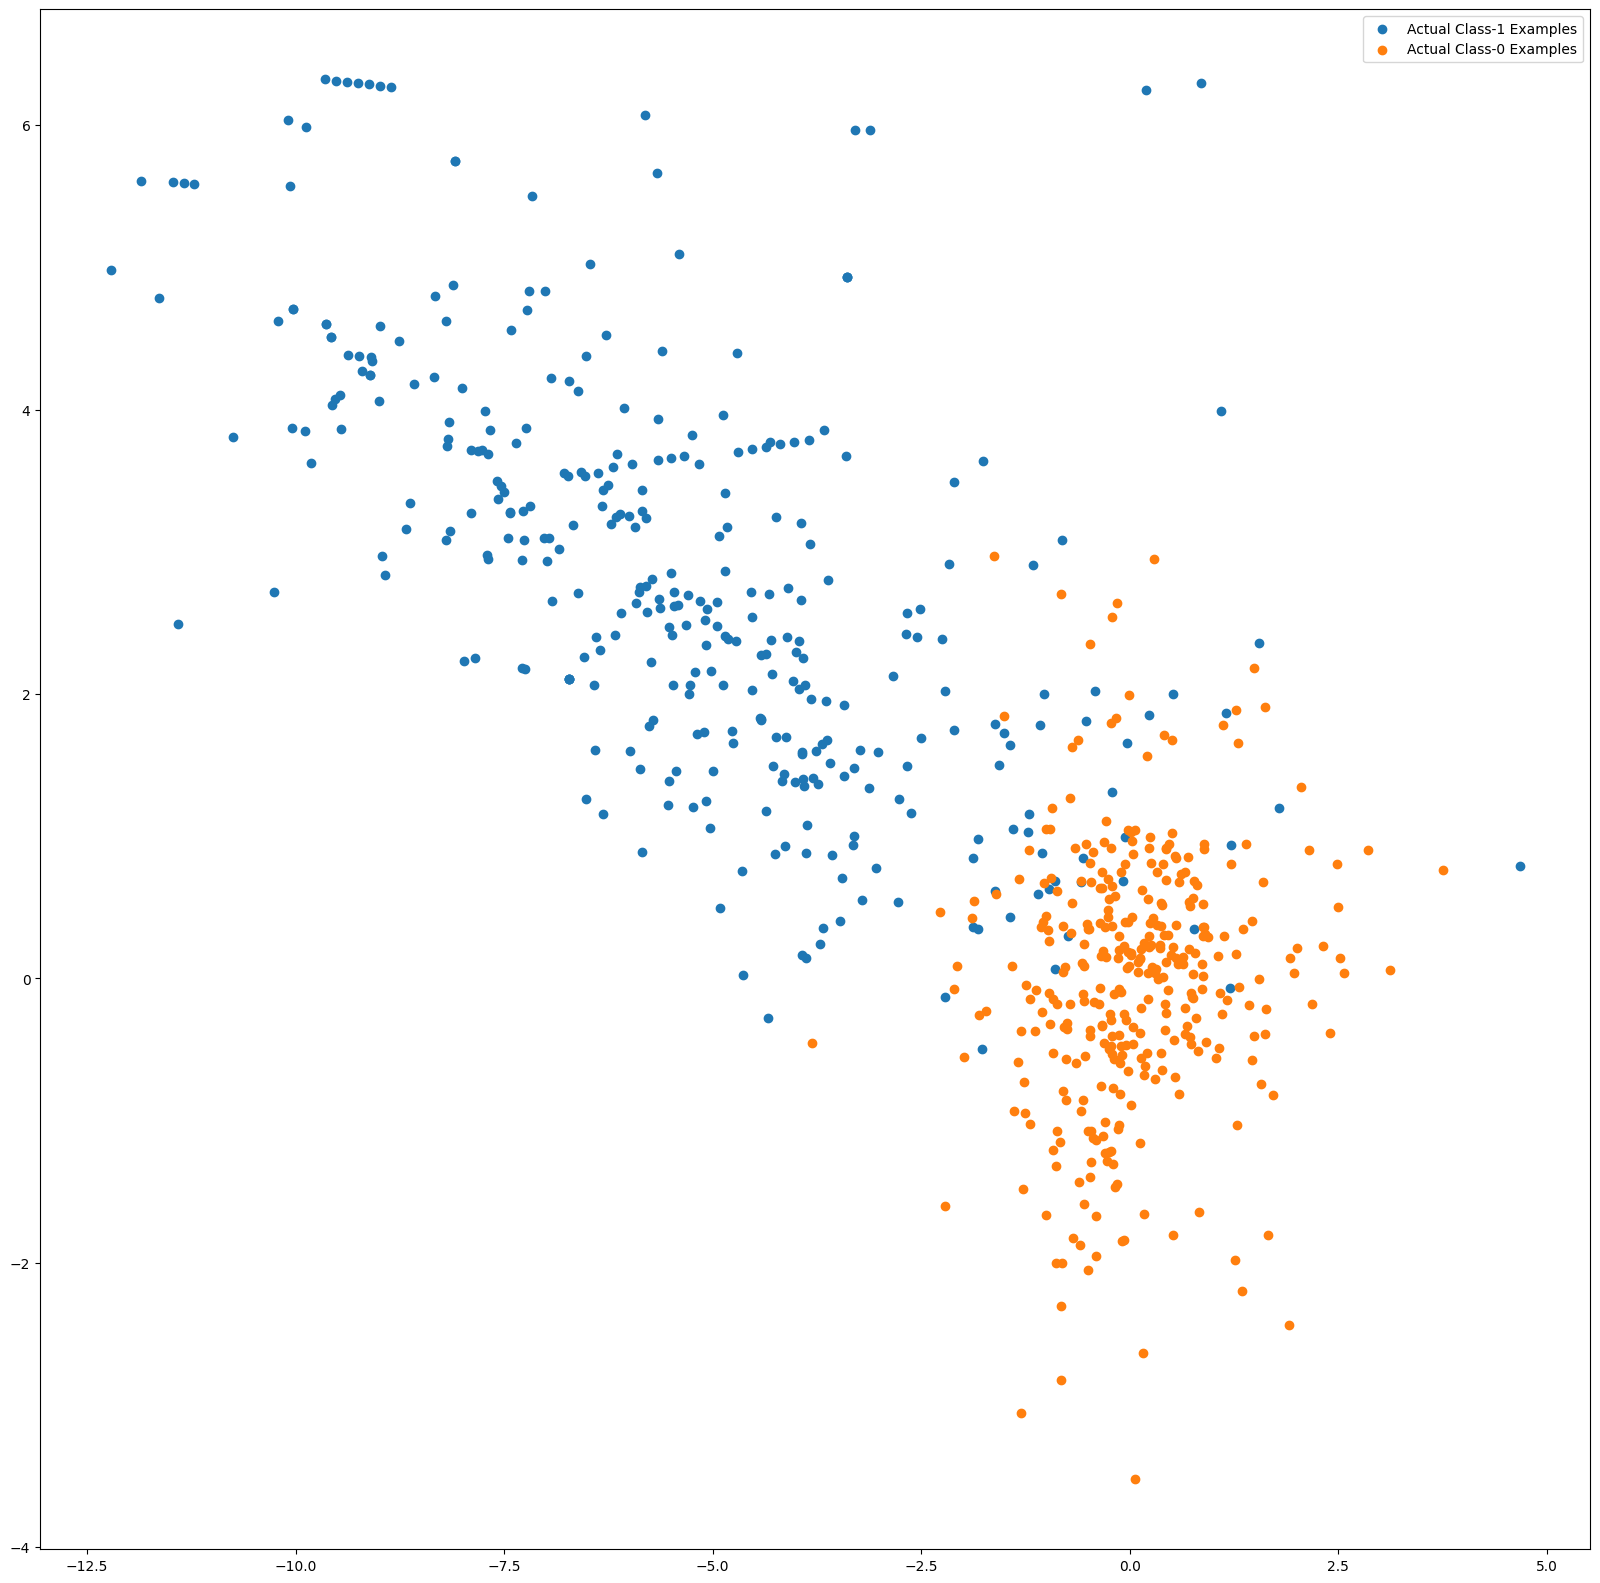

In [233]:
var_imp = []
#clf = xgb_bal_adasyn_model
clf = xgb_bal_smote_model

for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [238]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

In [237]:
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.977789008892825

In [239]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn,y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)




Train auc = 1.0
0.00017487835
